In [2]:
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-paper')
%matplotlib inline
import numpy as np

from sklearn import preprocessing
from pandas.plotting import scatter_matrix

from sklearn import preprocessing
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix


df = pd.read_csv("credit_default_train.csv", )


In [25]:
plt.rcParams.update(plt.rcParamsDefault)

## Gestione degli attributi mancanti

In [143]:
df = pd.read_csv("credit_default_train.csv", )

In [144]:
# Per sapere quanti valori sono null
df.isnull().sum()

limit                0
sex                100
education          127
status            1822
age                  0
ps-sep               0
ps-aug               0
ps-jul               0
ps-jun               0
ps-may               0
ps-apr               0
ba-sep               0
ba-aug               0
ba-jul               0
ba-jun               0
ba-may               0
ba-apr               0
pa-sep               0
pa-aug               0
pa-jul               0
pa-jun               0
pa-may               0
pa-apr               0
credit_default       0
dtype: int64

In [145]:
df['sex'].fillna(df['sex'].mode()[0], inplace=True)

df['education'].fillna(df['education'].mode()[0], inplace=True)

df['status'].fillna(df['status'].mode()[0], inplace=True)

In [146]:
df.isnull().sum()

limit             0
sex               0
education         0
status            0
age               0
ps-sep            0
ps-aug            0
ps-jul            0
ps-jun            0
ps-may            0
ps-apr            0
ba-sep            0
ba-aug            0
ba-jul            0
ba-jun            0
ba-may            0
ba-apr            0
pa-sep            0
pa-aug            0
pa-jul            0
pa-jun            0
pa-may            0
pa-apr            0
credit_default    0
dtype: int64

In [147]:
# Nella colonna età abbiamo vari record che hanno -1 come valore
# Va sostituito con la media
# Prima sostituisco i -1 con NaN e poi uso fillNa

df.age = df.age.replace({-1: np.nan})
median = int(df['age'].median())

df.fillna(median, inplace=True)

df.head()

,limit,sex,education,status,age,ps-sep,ps-aug,ps-jul,ps-jun,ps-may,...,ba-jun,ba-may,ba-apr,pa-sep,pa-aug,pa-jul,pa-jun,pa-may,pa-apr,credit_default
0,50000,male,graduate school,single,25.0,2,0,0,0,0,...,49535,30358,30302,2130,1905,1811,1100,1100,1200,no
1,200000,male,university,married,54.0,-1,-1,-1,-1,-1,...,6335,4616,7956,10120,7852,6336,4622,7956,5499,no
2,30000,female,high school,married,34.0,2,3,2,2,2,...,30496,29731,29047,0,1700,1100,3,1053,1303,no
3,140000,female,university,single,34.0,0,0,0,0,0,...,25224,26855,23783,2000,2000,900,2000,10000,5000,no
4,60000,female,high school,married,36.0,1,2,2,0,0,...,48738,49601,52773,1788,0,1894,1801,3997,0,yes


## Trasformazione degli attributi


In [148]:
label_encoders = dict()
column2encode = ['sex']

for col in column2encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [149]:
label_encoders = dict()
column2encode = ['education']

for col in column2encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [150]:
label_encoders = dict()
column2encode = ['status']

for col in column2encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [151]:
label_encoders = dict()
column2encode = ['credit_default']

for col in column2encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [152]:
df.head()

,limit,sex,education,status,age,ps-sep,ps-aug,ps-jul,ps-jun,ps-may,...,ba-jun,ba-may,ba-apr,pa-sep,pa-aug,pa-jul,pa-jun,pa-may,pa-apr,credit_default
0,50000,1,0,2,25.0,2,0,0,0,0,...,49535,30358,30302,2130,1905,1811,1100,1100,1200,0
1,200000,1,3,0,54.0,-1,-1,-1,-1,-1,...,6335,4616,7956,10120,7852,6336,4622,7956,5499,0
2,30000,0,1,0,34.0,2,3,2,2,2,...,30496,29731,29047,0,1700,1100,3,1053,1303,0
3,140000,0,3,2,34.0,0,0,0,0,0,...,25224,26855,23783,2000,2000,900,2000,10000,5000,0
4,60000,0,1,0,36.0,1,2,2,0,0,...,48738,49601,52773,1788,0,1894,1801,3997,0,1


In [153]:
# df.to_csv('out.csv')

In [154]:
df_ridotto = pd.DataFrame()
df_ridotto = df.iloc[:,0:5]
df_ridotto['ps-sep'] = df['ps-sep']
df_ridotto['ba-aug'] = df['ba-aug']
df_ridotto['pa-sep'] = df['pa-sep']
df_ridotto['credit_default'] = df['credit_default']

df_ridotto.head()

,limit,sex,education,status,age,ps-sep,ba-aug,pa-sep,credit_default
0,50000,1,0,2,25.0,2,49985,2130,0
1,200000,1,3,0,54.0,-1,9981,10120,0
2,30000,0,1,0,34.0,2,29280,0,0
3,140000,0,3,2,34.0,0,41717,2000,0
4,60000,0,1,0,36.0,1,48716,1788,1


In [137]:
# df_ridotto.to_csv('ridotto.csv')

## Matrice di correlazione

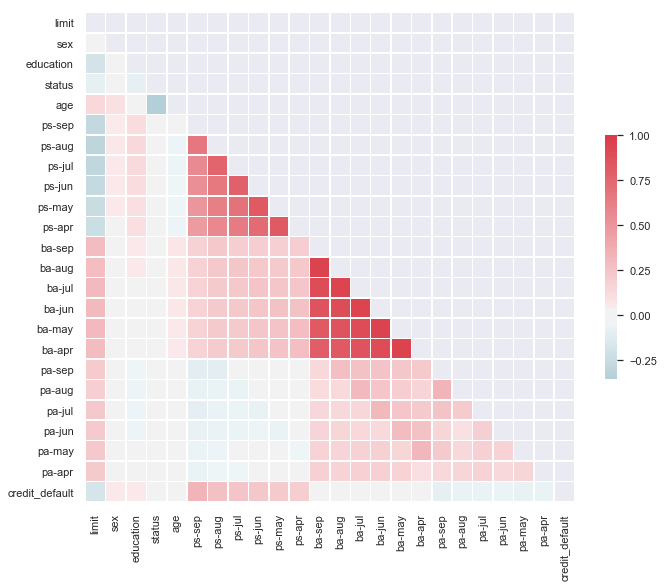

In [15]:
correlation = df.corr()

sns.set(style="dark")

# Generate a mask for the upper triangle
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Normalizzazione

In [16]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df.values)

In [17]:
X[:3]

array([[5.19480519e-02, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        7.40740741e-02, 4.00000000e-01, 2.22222222e-01, 2.00000000e-01,
        2.00000000e-01, 2.00000000e-01, 2.00000000e-01, 1.00839480e-01,
        1.77236133e-01, 1.70378543e-01, 1.15166914e-01, 1.67103281e-01,
        3.07774702e-01, 4.31735170e-03, 1.55246349e-03, 4.33681044e-03,
        3.75475318e-03, 2.63164191e-03, 2.26986415e-03, 0.00000000e+00],
       [2.46753247e-01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        6.11111111e-01, 1.00000000e-01, 1.11111111e-01, 1.00000000e-01,
        1.00000000e-01, 1.00000000e-01, 1.00000000e-01, 4.00177637e-02,
        1.18034097e-01, 1.05246304e-01, 4.77868294e-02, 1.28590472e-01,
        2.79040851e-01, 2.05124879e-02, 6.39892037e-03, 1.51728498e-02,
        1.57767902e-02, 1.90339482e-02, 1.04016525e-02, 0.00000000e+00],
       [2.59740260e-02, 0.00000000e+00, 3.33333333e-01, 0.00000000e+00,
        2.40740741e-01, 4.00000000e-01, 5.55555556e-01, 4.0000

## 1) Cercare i parametri per il clustering di K-Means


In [159]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [160]:
df = pd.read_csv("ridotto.csv")
df.head()

,limit,sex,education,status,age,ps-sep,ba-aug,pa-sep,credit_default
0,50000,1,0,2,25.0,2,49985,2130,0
1,200000,1,3,0,54.0,-1,9981,10120,0
2,30000,0,1,0,34.0,2,29280,0,0
3,140000,0,3,2,34.0,0,41717,2000,0
4,60000,0,1,0,36.0,1,48716,1788,1


In [161]:
#del df['credit_default']
del df['sex']
del df['education']
del df['status']
del df['age']


In [162]:
df.head()

,limit,ps-sep,ba-aug,pa-sep,credit_default
0,50000,2,49985,2130,0
1,200000,-1,9981,10120,0
2,30000,2,29280,0,0
3,140000,0,41717,2000,0
4,60000,1,48716,1788,1


## 1) KMeans con Limit, PS, BA, PA

Per prima cosa proviamo l'algoritmo K-Means su 4 attributi, limit, ps-sep, ba-aug, pa-sep.

In [288]:
df.iloc[:,0:4].head()

,limit,ps-sep,ba-aug,pa-sep
0,50000,2,49985,2130
1,200000,-1,9981,10120
2,30000,2,29280,0
3,140000,0,41717,2000
4,60000,1,48716,1788


In [289]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df.iloc[:,0:4].values)

In [290]:
# Calcoliamo Kmeans 50 volte andando 
# ogni volta a modificare il numero di 
# cluster da usare e per ogni esecuzione
# calcoliamo anche il valore dell'SSE
Silhouette_list = list()
sse_list = list()
max_k = 50
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X)
    
    sse = kmeans.inertia_
    sse_list.append(sse)
    Silhouette = silhouette_score(X, kmeans.labels_)
    Silhouette_list.append(Silhouette)

KeyboardInterrupt: 

In [25]:
diff = []
for i in range(0, len(sse_list)-1):
    tmp = sse_list[i]-sse_list[i+1]
    diff.append(tmp)

ordinata = []
for i in diff:
    ordinata.append(i)
ordinata.sort()
arr = []
for i in ordinata:
    index = diff.index(i)
    tmp = (i,index)
    arr.append(tmp)
print arr

[(0.09149155351083493, 46), (0.13877863674478164, 44), (0.22237486854187338, 42), (0.44480477547773845, 40), (0.5597755166187497, 36), (0.5811116582029499, 34), (0.5940562360759785, 33), (0.6145461168631243, 27), (0.618143460954478, 47), (0.6348916419131676, 43), (0.6434102529824202, 37), (0.6604669565179471, 39), (0.714751396753698, 30), (0.8335936601434639, 35), (0.8453238531301537, 38), (0.8870226535664116, 45), (0.9619104464215127, 25), (1.0152372641151786, 32), (1.0688832090984306, 31), (1.081772439186878, 29), (1.1195381122093266, 41), (1.1356319844776905, 21), (1.1949287309363257, 28), (1.2677544889682366, 22), (1.5483314857970214, 26), (1.6790222885386754, 23), (1.822588523059359, 24), (1.9007615016381507, 16), (2.0441535080119166, 18), (2.204940438208176, 20), (2.210732536615879, 14), (2.5970629905425966, 19), (2.8339268664695823, 17), (3.13934453627229, 13), (3.172298247058592, 11), (4.4874672589529965, 15), (5.134305180702995, 12), (5.404751510790561, 10), (5.422642214264471

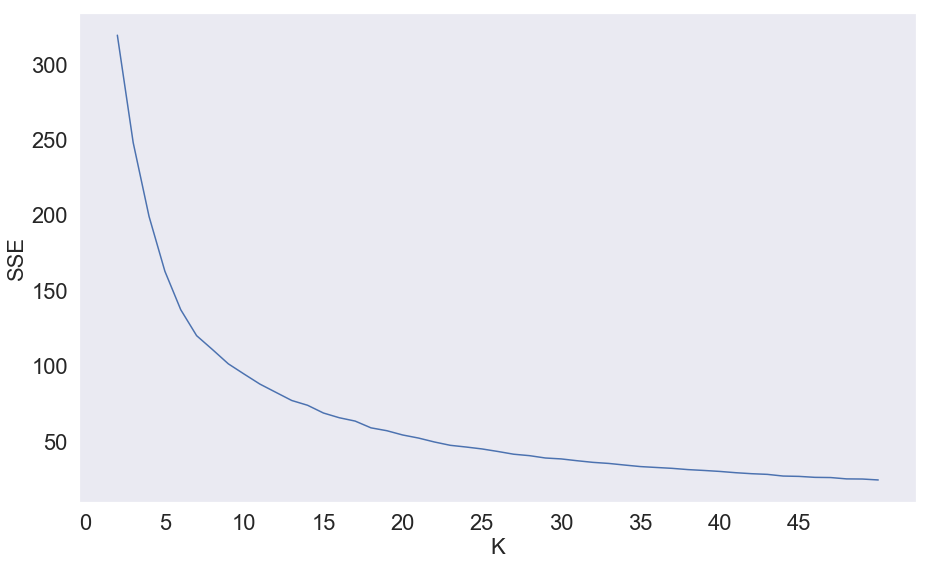

In [26]:
# Plot dell'SSE al variare di K
plt.subplots(figsize=(15, 9))
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.xticks(np.arange(0, 50, 5))
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [27]:


ordinata = []
for i in Silhouette_list:
    ordinata.append(i)
ordinata.sort()

arr = []
for i in ordinata:
    index = Silhouette_list.index(i)
    tmp = (i,index)
    arr.append(tmp)
print arr

[(0.3457166300723719, 2), (0.34753128840917746, 3), (0.34821370041843464, 12), (0.3537944581211375, 15), (0.3594052464380353, 7), (0.36036243448150806, 8), (0.36108508426178604, 19), (0.3640170313689733, 11), (0.3661117305941713, 4), (0.36628783697041445, 9), (0.367460200988731, 10), (0.36818053749536656, 14), (0.37189398069042107, 17), (0.37306312707485023, 6), (0.37357088856425436, 22), (0.37400737782839016, 16), (0.37567576677843567, 24), (0.3777050005445581, 18), (0.37858556260182086, 13), (0.38167624124822663, 26), (0.3822366935942992, 20), (0.3836342389740827, 28), (0.386053903764411, 5), (0.38857911819684776, 23), (0.38877910420675615, 21), (0.39001607700508184, 27), (0.3926171809513127, 35), (0.3965209128973962, 32), (0.39698494584385535, 31), (0.39786687780272306, 30), (0.39872085187554074, 37), (0.3993740590629031, 33), (0.3998555322539087, 25), (0.4013905351515301, 0), (0.40182103581189743, 38), (0.4018840475234083, 43), (0.4025488996467983, 45), (0.40287770017088176, 41), (

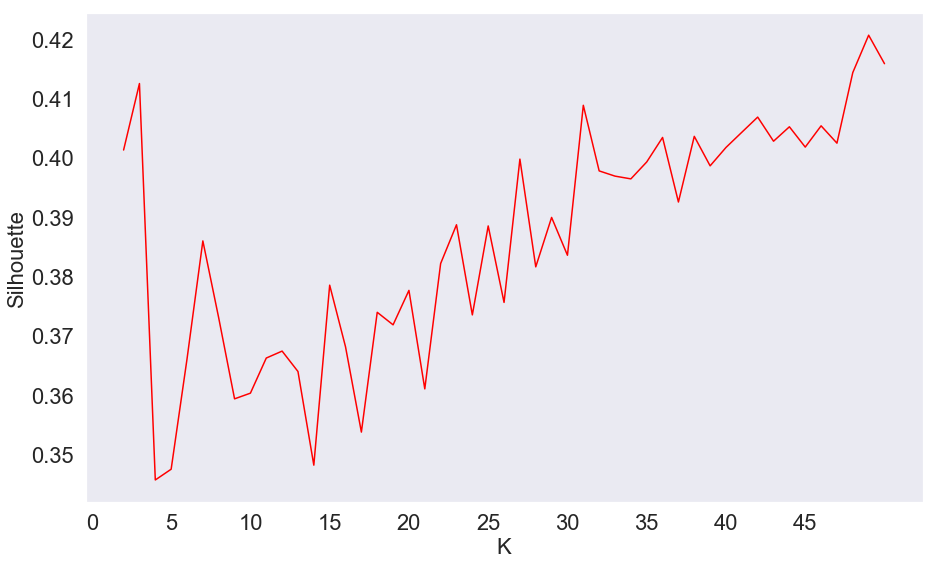

In [28]:
# Plot dell'Silhouette al variare di K
plt.subplots(figsize=(15, 9))
plt.plot(range(2, len(Silhouette_list) + 2), Silhouette_list, color='red')
plt.ylabel('Silhouette', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.xticks(np.arange(0, 50, 5))
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

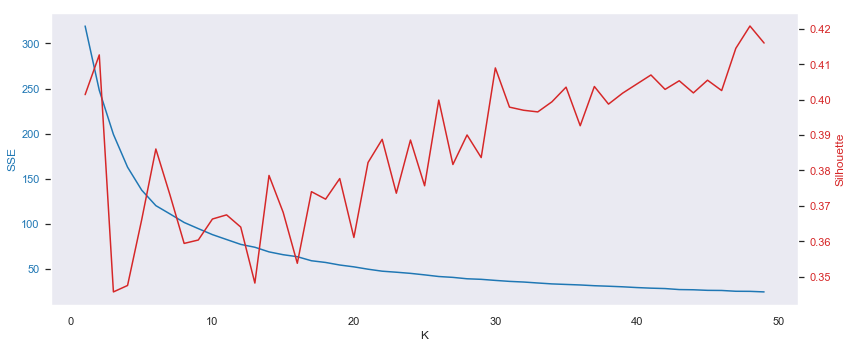

In [29]:
fig, ax1 = plt.subplots(figsize=(12, 5))
t = np.arange(1, 50, 1)
color = 'tab:blue'
ax1.set_xlabel('K')
ax1.set_ylabel('SSE', color=color)
ax1.plot(t, sse_list, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Silhouette', color=color)  # we already handled the x-label with ax1
ax2.plot(t, Silhouette_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## 1) Clustering con KMeans (Limit, PS, BA, PA)

In [30]:
kmeans = KMeans(n_clusters=10, n_init=10, max_iter=100)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Cluster 0: 744 (0.00)
Cluster 1: 1093 (0.00)
Cluster 2: 240 (0.00)
Cluster 3: 1377 (0.00)
Cluster 4: 913 (0.00)
Cluster 5: 681 (0.00)
Cluster 6: 955 (0.00)
Cluster 7: 563 (0.00)
Cluster 8: 434 (0.00)
Cluster 9: 3000 (0.00)
[744, 1093, 240, 1377, 913, 681, 955, 563, 434, 3000]


([<matplotlib.axis.XTick at 0x11f531210>,
 <a list of 10 Text xticklabel objects>)

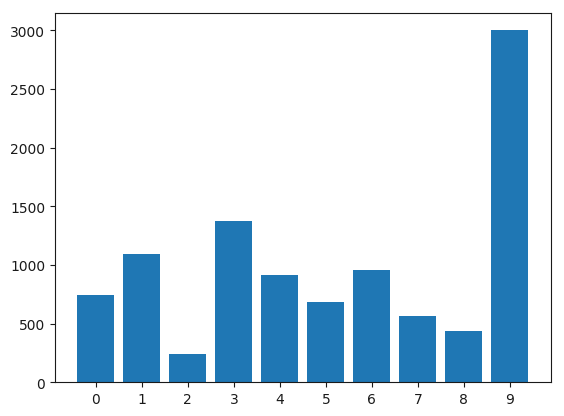

In [47]:
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
sizes = dict(zip(bins, hist))

# Dimensione dei vari cluster con istogramma relativo alla dimensione dei vari cluster
sizeAr = []
idAr = []
for id_cluster, size in sizes.items():
    print('Cluster %d: %d (%.2f)' % (id_cluster, size, size/len(X)))
    sizeAr.append(size)
    idAr.append(id_cluster)
print sizeAr
x = np.arange(10)
plt.bar(x, height= sizeAr)
plt.xticks(x, x)

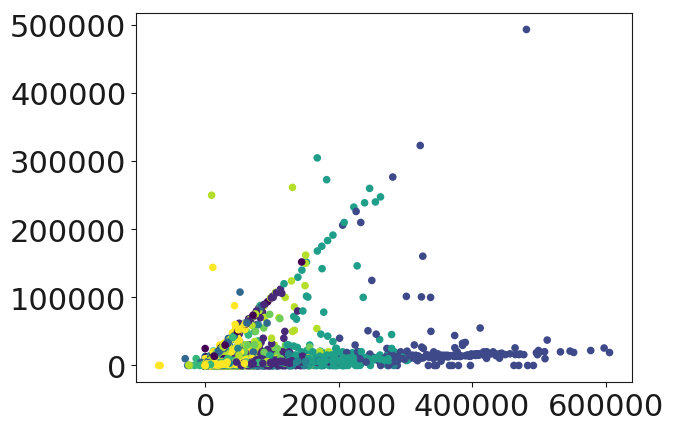

In [48]:
# Visualizzazione del cluster in due dimensioni

plt.scatter(df['ba-aug'], df['pa-sep'], c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

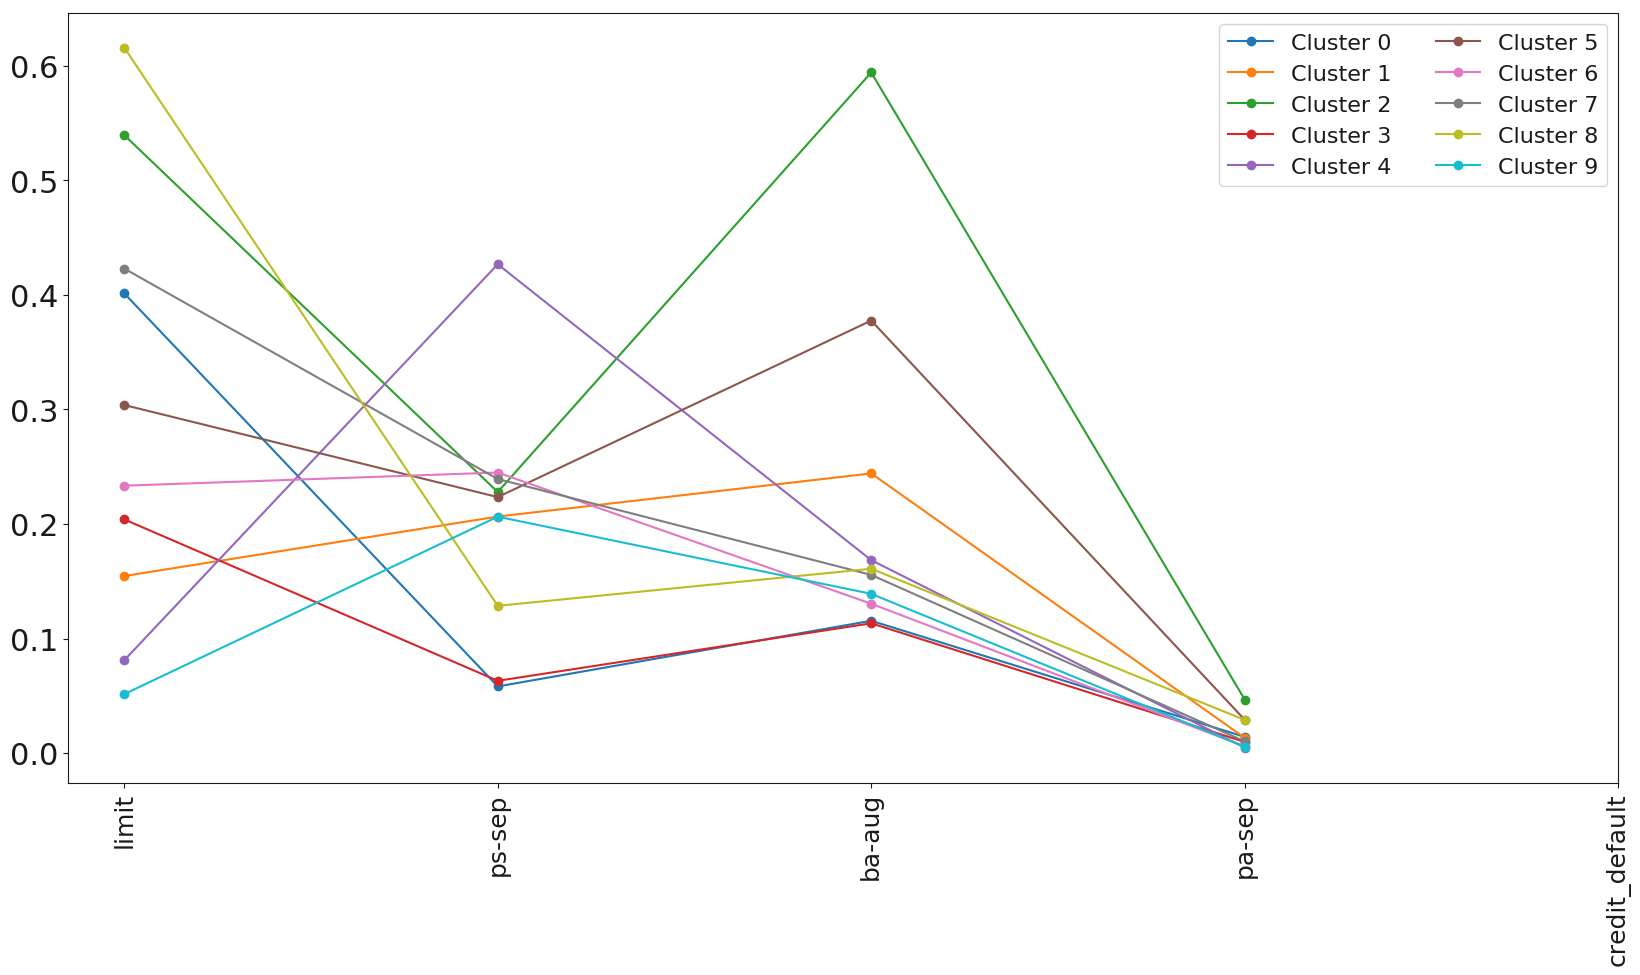

In [49]:
# Per ogni centroide visualizzo la posizione del centroide
# corrispondente

centers = kmeans.cluster_centers_

plt.figure(figsize=(20, 10))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(df.columns)), df.columns, fontsize=18)
plt.legend(fontsize=16, ncol=2)
plt.xticks(rotation=90)
plt.show()

In [50]:
Silhouette = silhouette_score(X, kmeans.labels_)
print Silhouette

0.36121668327856704


## 1) Quanto i cluster sono utili per capire credit_default

In [51]:
# Aggiungiamo il label che ho ottenuto con il cluster ad ogni riga
# della tabella.

df['Label'] = kmeans.labels_

for col in column2encode:
    le = label_encoders[col]
    df[col] = le.inverse_transform(df[col])

In [102]:
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
sizes = dict(zip(bins, hist))

# Dimensione dei vari cluster

for id_cluster, size in sizes.items():
    print('Cluster %d: %d (%.2f)' % (id_cluster, size, size/len(X)))

Cluster 0: 744 (0.00)
Cluster 1: 1093 (0.00)
Cluster 2: 240 (0.00)
Cluster 3: 1377 (0.00)
Cluster 4: 913 (0.00)
Cluster 5: 681 (0.00)
Cluster 6: 955 (0.00)
Cluster 7: 563 (0.00)
Cluster 8: 434 (0.00)
Cluster 9: 3000 (0.00)


In [52]:
df.head()

,limit,ps-sep,ba-aug,pa-sep,credit_default,Label
0,50000,2,49985,2130,no,4
1,200000,-1,9981,10120,no,3
2,30000,2,29280,0,no,4
3,140000,0,41717,2000,no,1
4,60000,1,48716,1788,yes,9


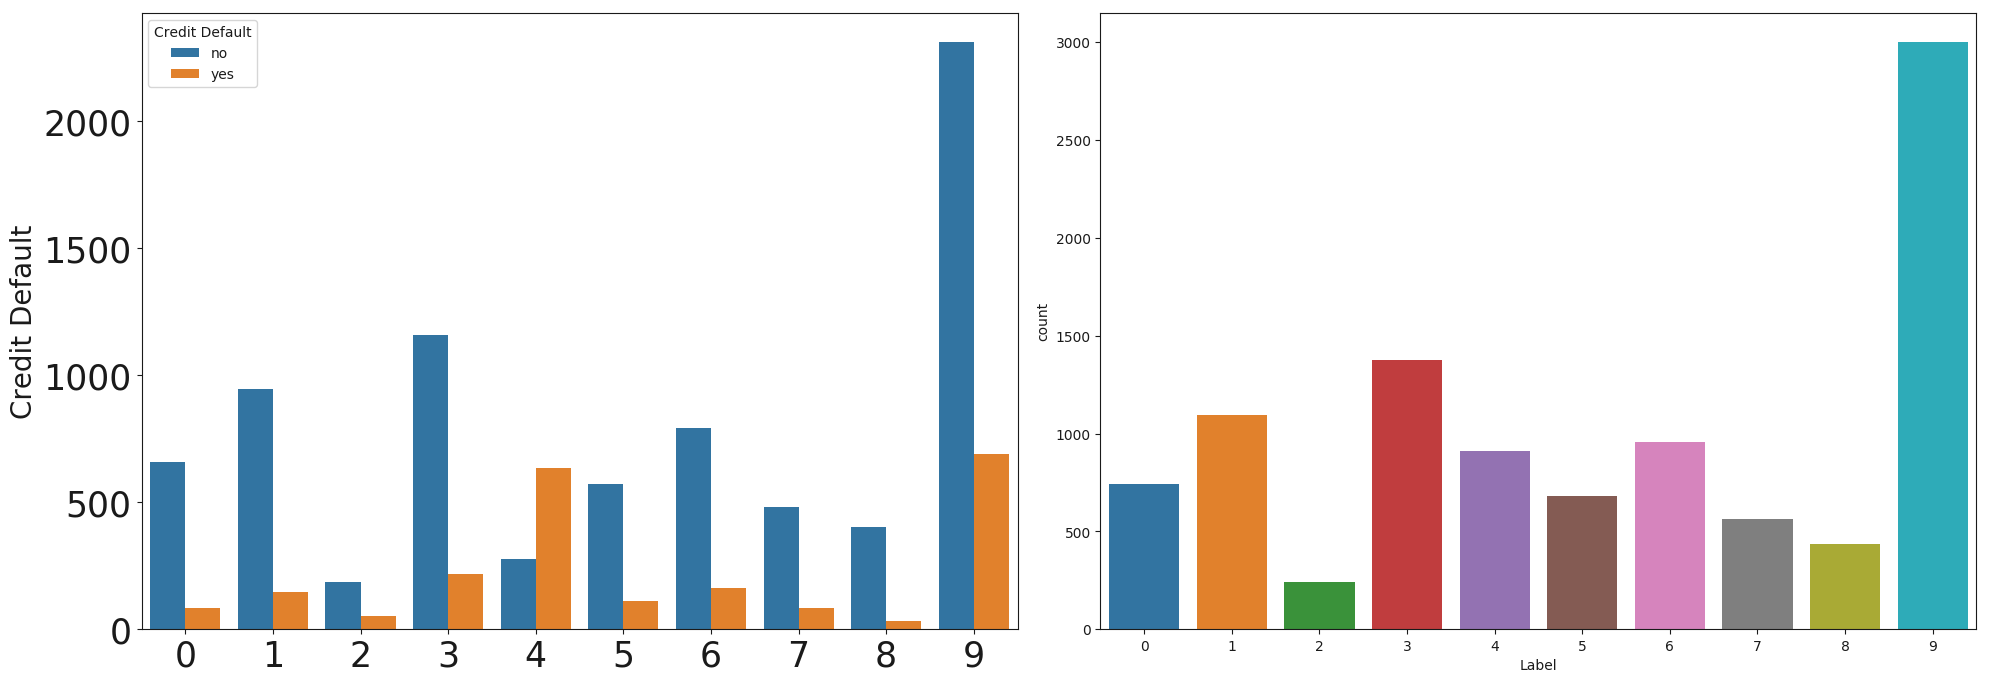

In [113]:
fig = plt.figure(figsize=(20,20))
fig_dims = (3,2)

plt.subplot2grid(fig_dims, (0, 0))
b = sns.countplot(df['Label'], hue=df['credit_default'])
plt.xticks(rotation=0)
b.set_xlabel("",fontsize=20)
b.set_ylabel("Credit Default",fontsize=20)
b.tick_params(labelsize=25)
b.legend_.set_title('Credit Default')

tmpDF = df[['ps-sep', 'Label']]
# Plot completo con la distribuzione dei vari record all'interno dei vari cluster
plt.subplot2grid(fig_dims, (0, 1))
sns.countplot(x='Label',data=tmpDF)



plt.tight_layout()
plt.show()




IndexError: invalid index

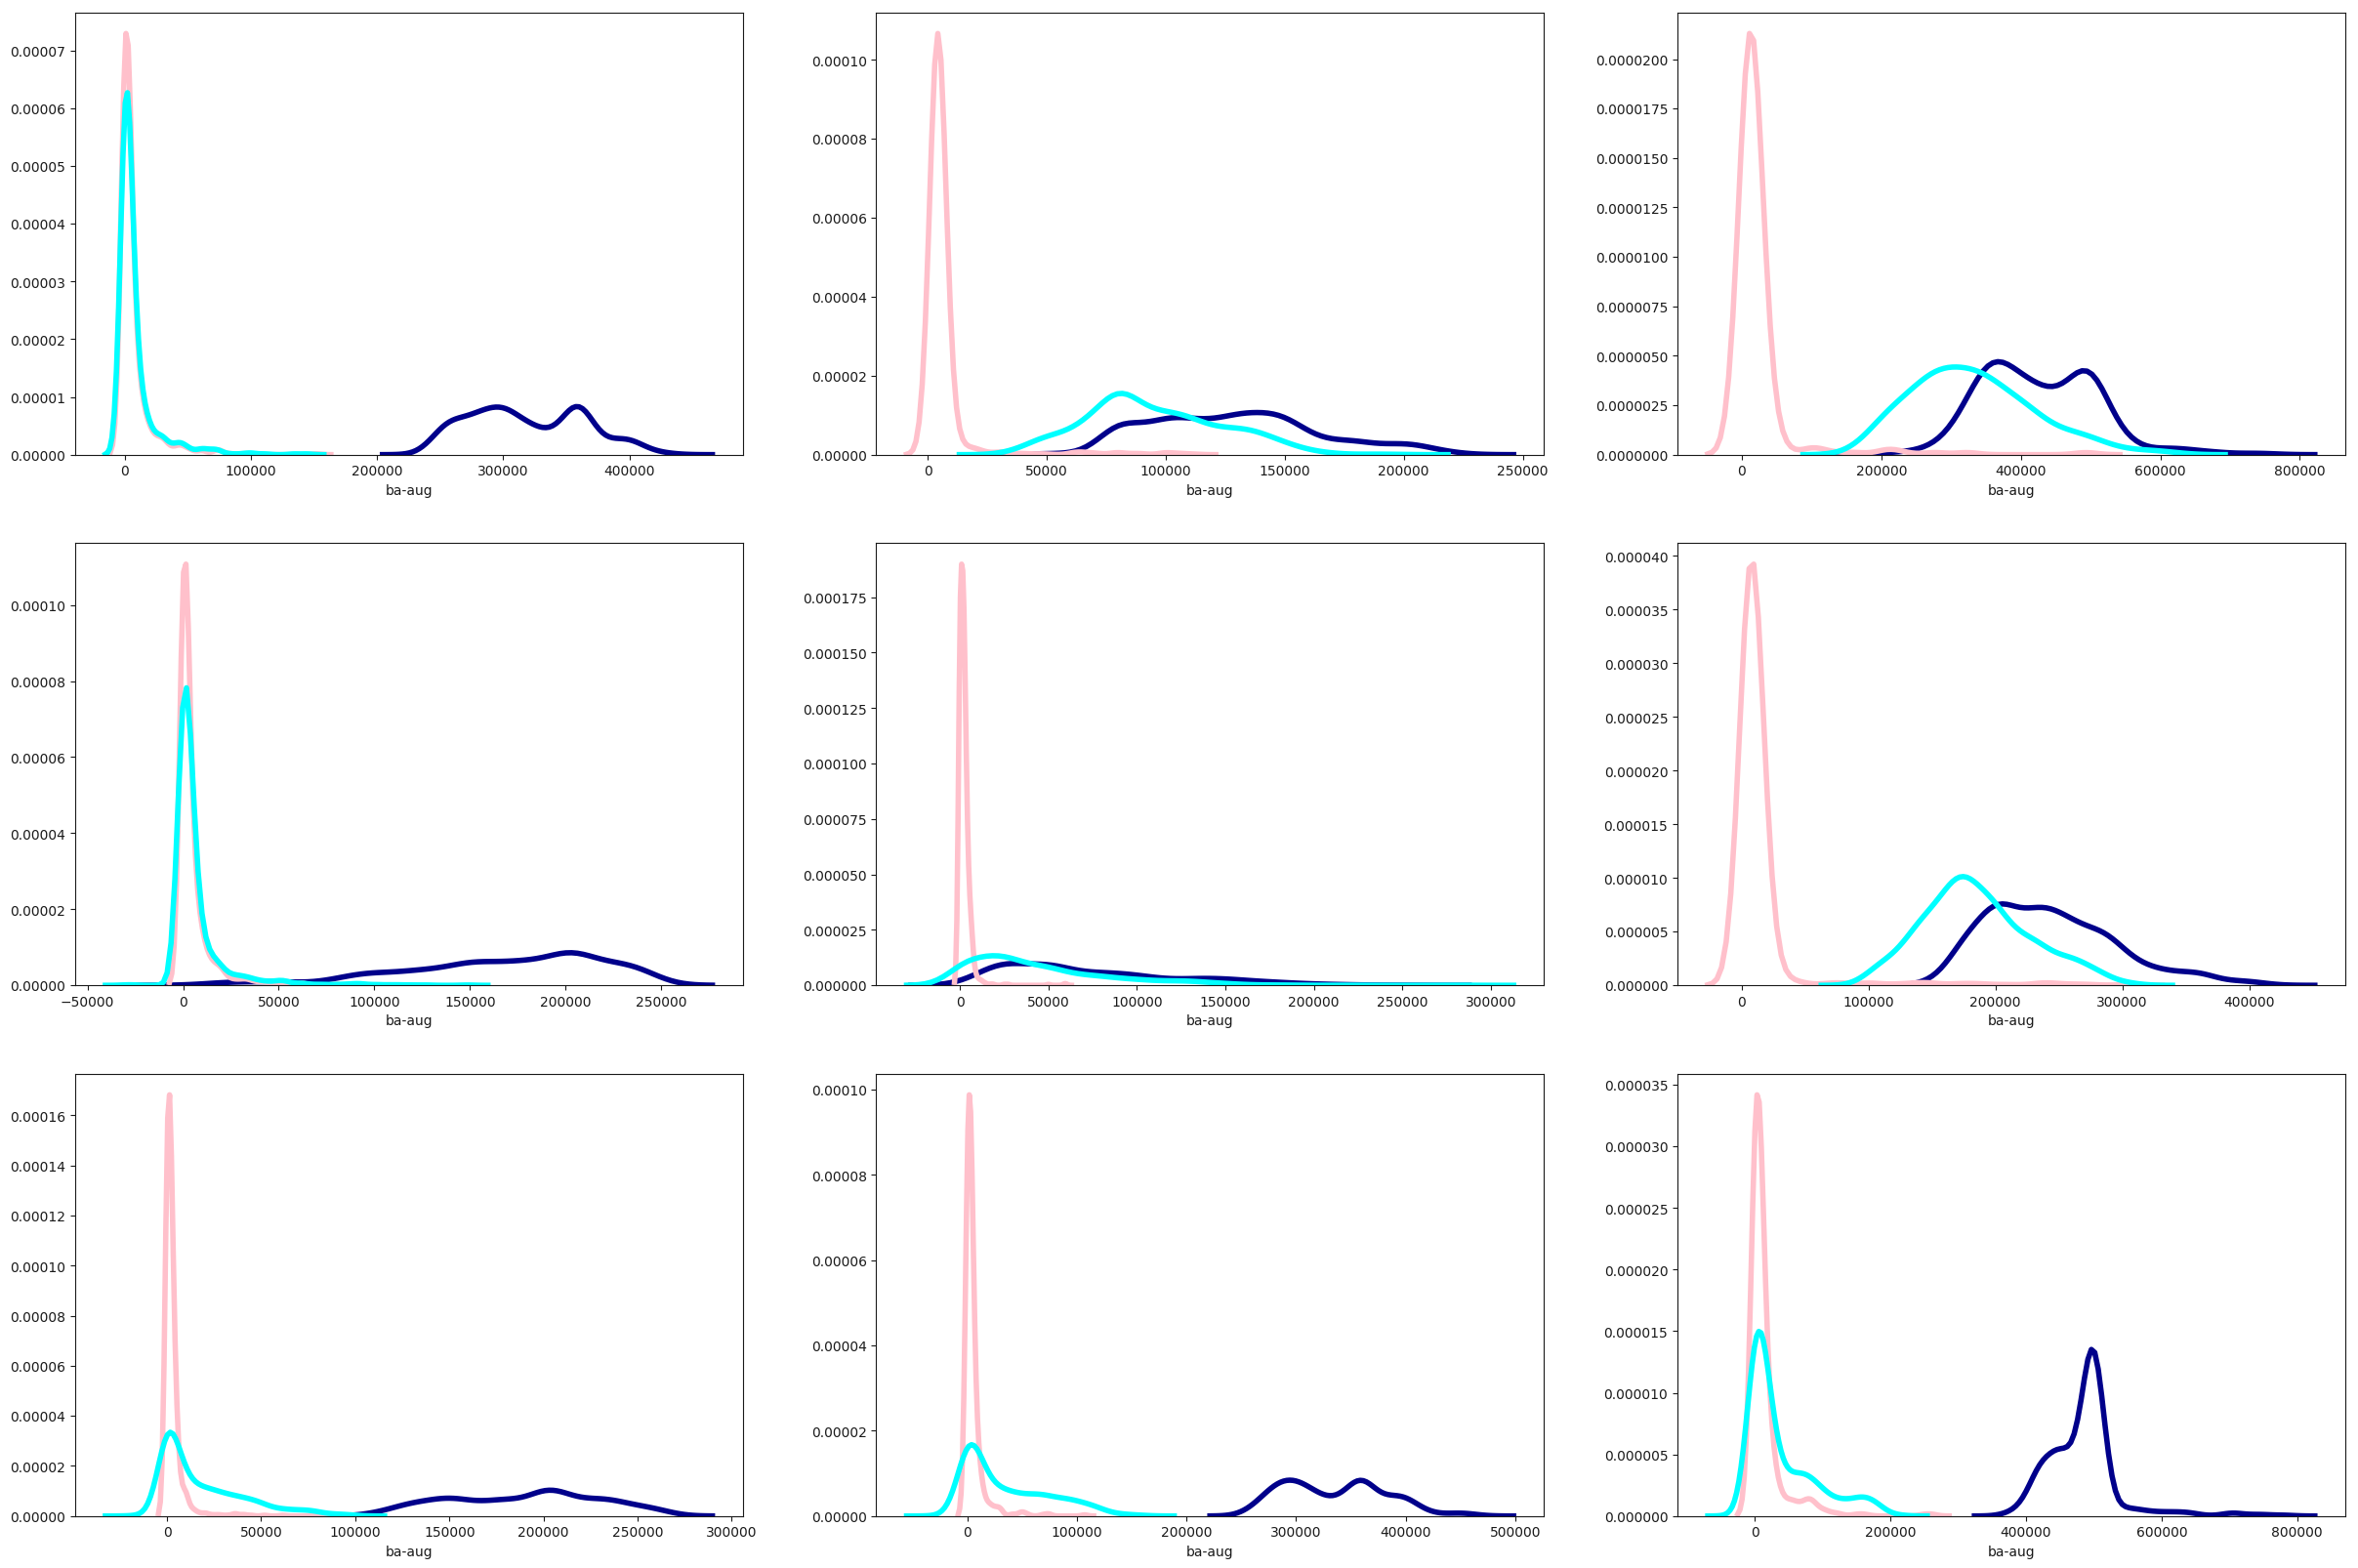

In [165]:
fig = plt.figure(figsize=(30,20))
fig_dims = (3,3)


plt.subplot2grid(fig_dims, (0, 0))
sns.distplot(df[df['Label'] == 0]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 0]['pa-sep'], hist=False, kde=True, 
             color = 'pink', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 0]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


plt.subplot2grid(fig_dims, (0, 1))
sns.distplot(df[df['Label'] == 1]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 1]['pa-sep'], hist=False, kde=True, 
             color = 'pink', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 1]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.subplot2grid(fig_dims, (0, 2))
sns.distplot(df[df['Label'] == 2]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 2]['pa-sep'], hist=False, kde=True, 
             color = 'pink', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 2]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.subplot2grid(fig_dims, (1, 0))
sns.distplot(df[df['Label'] == 3]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 3]['pa-sep'], hist=False, kde=True, 
             color = 'pink', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 3]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.subplot2grid(fig_dims, (1, 1))
sns.distplot(df[df['Label'] == 4]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 4]['pa-sep'], hist=False, kde=True, 
             color = 'pink', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 4]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


plt.subplot2grid(fig_dims, (1, 2))
sns.distplot(df[df['Label'] == 5]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 5]['pa-sep'], hist=False, kde=True, 
             color = 'pink', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 5]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


plt.subplot2grid(fig_dims, (2, 0))
sns.distplot(df[df['Label'] == 6]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 6]['pa-sep'], hist=False, kde=True, 
             color = 'pink', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 6]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.subplot2grid(fig_dims, (2, 1))
sns.distplot(df[df['Label'] == 7]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 7]['pa-sep'], hist=False, kde=True, 
             color = 'pink', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 7]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.subplot2grid(fig_dims, (2, 2))
sns.distplot(df[df['Label'] == 8]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 8]['pa-sep'], hist=False, kde=True, 
             color = 'pink', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 8]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.subplot2grid(fig_dims, (2, 3))
sns.distplot(df[df['Label'] == 9]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 20})

sns.distplot(df[df['Label'] == 9]['pa-sep'], hist=False, kde=True, 
             color = 'pink', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 20})

sns.distplot(df[df['Label'] == 9]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 20})

# 2) Versione di KMeans con Limit, BA, PA

In [163]:
del df['ps-sep']

In [164]:
df.iloc[:,0:3].head()

,limit,ba-aug,pa-sep
0,50000,49985,2130
1,200000,9981,10120
2,30000,29280,0
3,140000,41717,2000
4,60000,48716,1788


In [167]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df.iloc[:,0:3].values)

In [294]:
# Calcoliamo Kmeans 50 volte andando 
# ogni volta a modificare il numero di 
# cluster da usare e per ogni esecuzione
# calcoliamo anche il valore dell'SSE
Silhouette_list = list()
sse_list = list()
max_k = 50
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X)
    
    sse = kmeans.inertia_
    sse_list.append(sse)
    Silhouette = silhouette_score(X, kmeans.labels_)
    Silhouette_list.append(Silhouette)

In [295]:
diff = []
for i in range(0, len(sse_list)-1):
    tmp = sse_list[i]-sse_list[i+1]
    diff.append(tmp)

ordinata = []
for i in diff:
    ordinata.append(i)
ordinata.sort()
arr = []
for i in ordinata:
    index = diff.index(i)
    tmp = (i,index)
    arr.append(tmp)
print arr

[(0.10604155552366024, 46), (0.1135542792256814, 41), (0.11667265406483374, 47), (0.12215337766583012, 35), (0.1812567346954257, 45), (0.2057149298472769, 44), (0.22278848688927688, 38), (0.2323273899994973, 39), (0.23329823199992106, 43), (0.24721975384784223, 40), (0.2670066335037191, 26), (0.27284894813321436, 37), (0.2778945493917053, 31), (0.29806713034458454, 42), (0.3187503188052361, 32), (0.35562189556523727, 33), (0.3902961670762224, 19), (0.4193582473546602, 36), (0.43360575236097887, 28), (0.43573961572039543, 30), (0.4426399071464431, 34), (0.4456568765590081, 27), (0.48809413008460467, 23), (0.49676095496066, 22), (0.5061897889897011, 21), (0.5195548702826578, 29), (0.6610811075386831, 24), (0.6776954880360222, 16), (0.6841903506645579, 25), (0.8088805163110173, 18), (0.9177258090667166, 17), (1.1139898042665237, 14), (1.1322927897937092, 15), (1.2373080327980652, 20), (1.7773059164076237, 13), (1.8028968268033765, 12), (2.2485364865370876, 11), (2.2625698940165577, 10), (

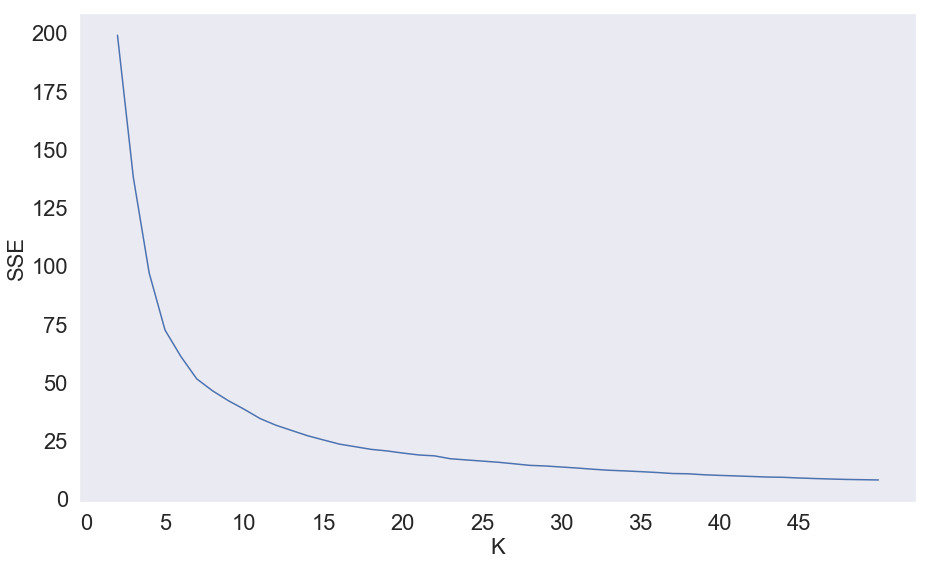

In [296]:
# Plot dell'SSE al variare di K
plt.subplots(figsize=(15, 9))
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.xticks(np.arange(0, 50, 5))
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [297]:
ordinata = []
for i in Silhouette_list:
    ordinata.append(i)
ordinata.sort()

arr = []
for i in ordinata:
    index = Silhouette_list.index(i)
    tmp = (i,index)
    arr.append(tmp)
print arr

[(0.39220291050248013, 28), (0.4012994486841095, 34), (0.40282607958054906, 22), (0.4033130303257643, 27), (0.4047678052397748, 25), (0.404802163569691, 24), (0.4065096909668829, 32), (0.40807471716589, 36), (0.4086364481586438, 33), (0.4086876288424928, 44), (0.4099126318023, 48), (0.41162259771179915, 8), (0.41229791885806144, 42), (0.41244109172523524, 47), (0.41273897227561085, 14), (0.4128699389889716, 41), (0.4135694684959804, 39), (0.4144406545392446, 31), (0.4146891340838948, 30), (0.41490620848124926, 17), (0.41496052094279673, 46), (0.41505347571765594, 38), (0.41551815578096274, 7), (0.4161863308899334, 21), (0.4162437020415149, 40), (0.4166242083403752, 19), (0.41664167331773816, 43), (0.4170417779523649, 16), (0.41756255780561696, 29), (0.4188676033608201, 18), (0.4200154805846706, 35), (0.4210147887170611, 26), (0.4210490207958511, 23), (0.4222899232179322, 15), (0.4241070851251765, 37), (0.42579644559334473, 45), (0.4258723318827308, 13), (0.427242578227225, 12), (0.4279

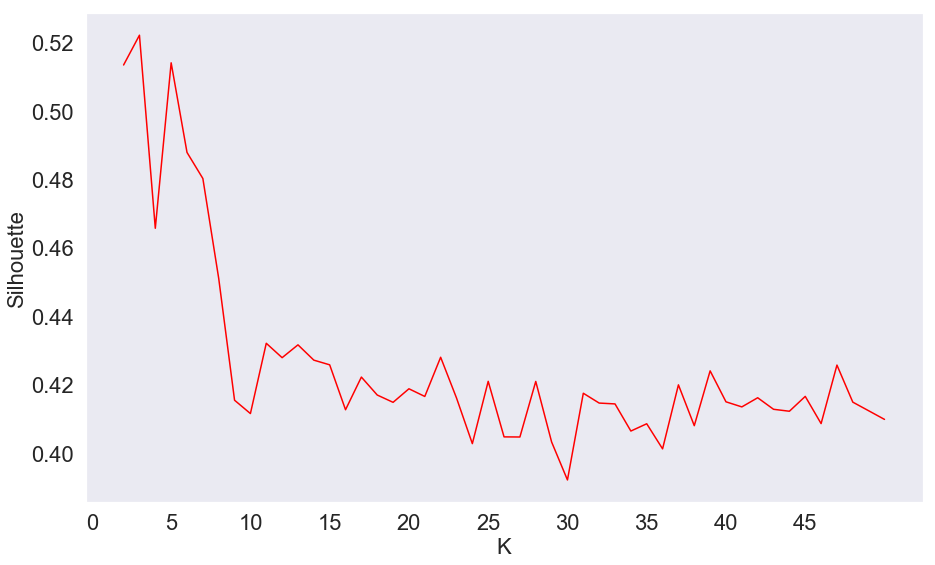

In [298]:
# Plot dell'Silhouette al variare di K
plt.subplots(figsize=(15, 9))
plt.plot(range(2, len(Silhouette_list) + 2), Silhouette_list, color='red')
plt.ylabel('Silhouette', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.xticks(np.arange(0, 50, 5))
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

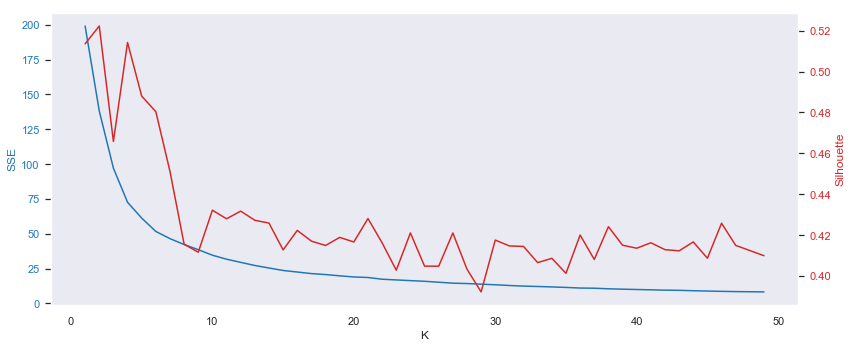

In [299]:
fig, ax1 = plt.subplots(figsize=(12, 5))
t = np.arange(1, 50, 1)
color = 'tab:blue'
ax1.set_xlabel('K')
ax1.set_ylabel('SSE', color=color)
ax1.plot(t, sse_list, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Silhouette', color=color)  # we already handled the x-label with ax1
ax2.plot(t, Silhouette_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Clustering con KMeans (Limit, BA, PA)

In [300]:
kmeans = KMeans(n_clusters=11, n_init=11, max_iter=100)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=11, n_init=11, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [301]:
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
sizes = dict(zip(bins, hist))

# Dimensione dei vari cluster

for id_cluster, size in sizes.items():
    print('Cluster %d: %d (%.2f)' % (id_cluster, size, size/len(X)))


Cluster 0: 816 (0.00)
Cluster 1: 3119 (0.00)
Cluster 2: 401 (0.00)
Cluster 3: 1346 (0.00)
Cluster 4: 143 (0.00)
Cluster 5: 31 (0.00)
Cluster 6: 1323 (0.00)
Cluster 7: 999 (0.00)
Cluster 8: 170 (0.00)
Cluster 9: 472 (0.00)
Cluster 10: 1180 (0.00)


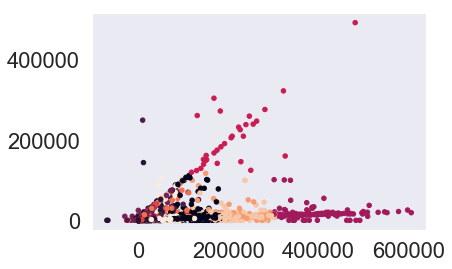

In [302]:
# Visualizzazione del cluster in due dimensioni

plt.scatter(df['ba-aug'], df['pa-sep'], c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

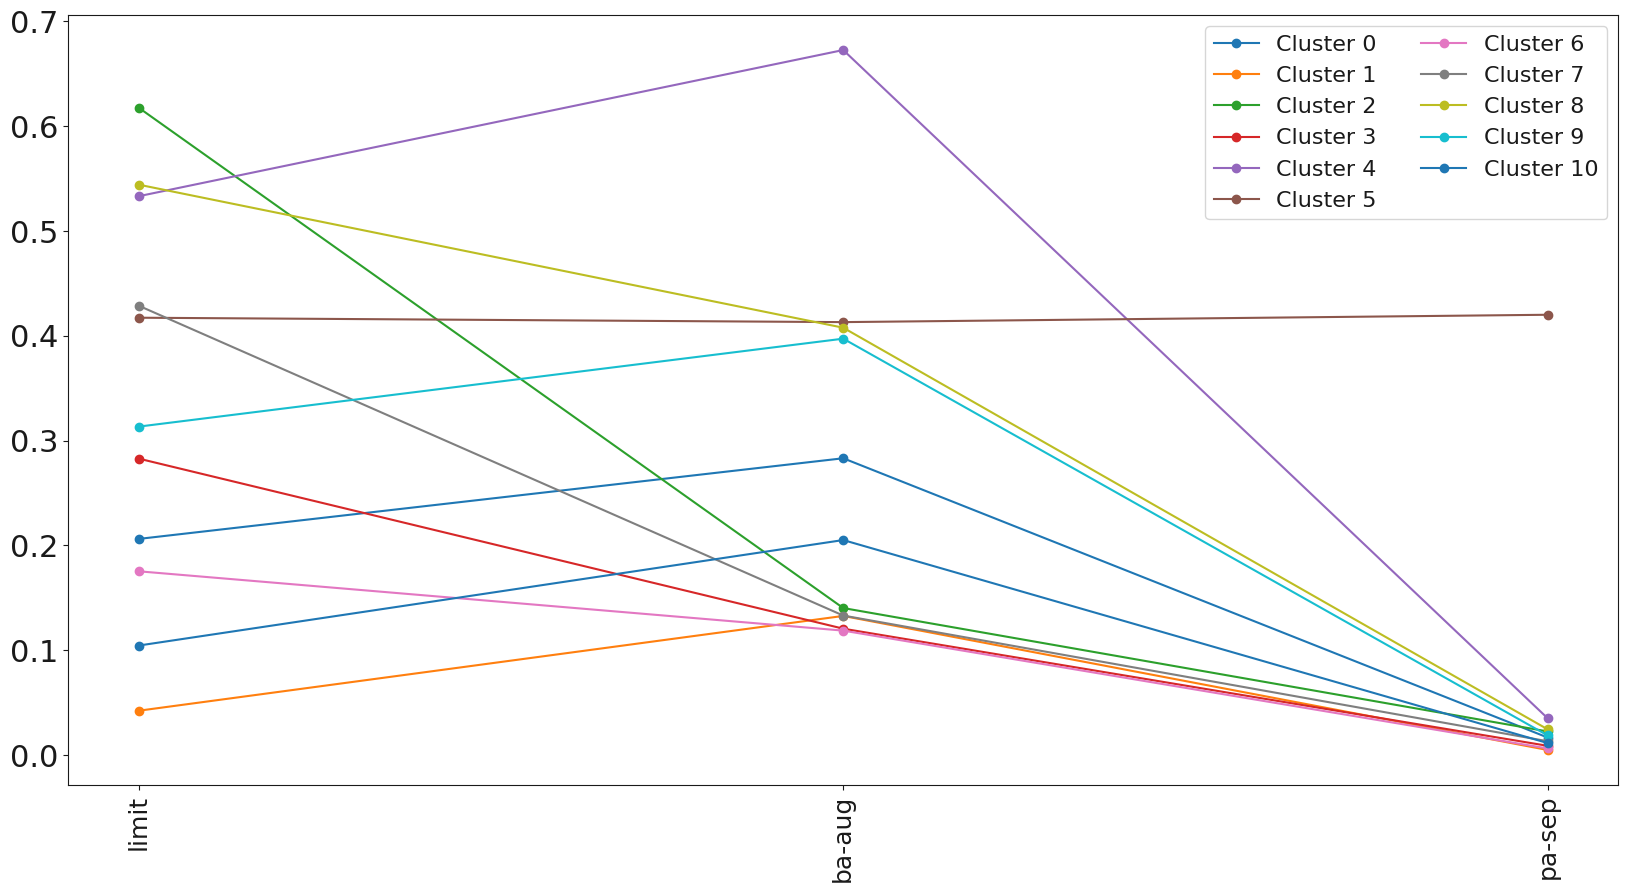

In [320]:
# Per ogni centroide visualizzo la posizione del centroide
# corrispondente

centers = kmeans.cluster_centers_

plt.figure(figsize=(20, 10))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(df.columns[0:3])), df.columns[0:3], fontsize=18)
plt.legend(fontsize=16, ncol=2)
plt.xticks(rotation=90)
plt.show()

In [304]:
Silhouette = silhouette_score(X, kmeans.labels_)
print Silhouette

0.4299742323889855


## Quanto i cluster sono utili per capire credit_default

In [305]:
label_encoders = dict()
column2encode = ['credit_default']

for col in column2encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
df.head()

,limit,ba-aug,pa-sep,credit_default
0,50000,49985,2130,0
1,200000,9981,10120,0
2,30000,29280,0,0
3,140000,41717,2000,0
4,60000,48716,1788,1


In [306]:
# Aggiungiamo il label che ho ottenuto con il cluster ad ogni riga
# della tabella.

df['Label'] = kmeans.labels_

for col in column2encode:
    le = label_encoders[col]
    df[col] = le.inverse_transform(df[col])

In [307]:
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
sizes = dict(zip(bins, hist))

# Dimensione dei vari cluster

for id_cluster, size in sizes.items():
    print('Cluster %d: %d (%.2f)' % (id_cluster, size, size/len(X)))

Cluster 0: 816 (0.00)
Cluster 1: 3119 (0.00)
Cluster 2: 401 (0.00)
Cluster 3: 1346 (0.00)
Cluster 4: 143 (0.00)
Cluster 5: 31 (0.00)
Cluster 6: 1323 (0.00)
Cluster 7: 999 (0.00)
Cluster 8: 170 (0.00)
Cluster 9: 472 (0.00)
Cluster 10: 1180 (0.00)


In [142]:
df.head()

,limit,sex,education,status,age,ps-aug,ps-jul,ps-jun,ps-may,ps-apr,...,ba-jun,ba-may,ba-apr,pa-sep,pa-aug,pa-jul,pa-jun,pa-may,pa-apr,credit_default
0,50000,1,0,2,25.0,0,0,0,0,0,...,49535,30358,30302,2130,1905,1811,1100,1100,1200,0
1,200000,1,3,0,54.0,-1,-1,-1,-1,-1,...,6335,4616,7956,10120,7852,6336,4622,7956,5499,0
2,30000,0,1,0,34.0,3,2,2,2,0,...,30496,29731,29047,0,1700,1100,3,1053,1303,0
3,140000,0,3,2,34.0,0,0,0,0,0,...,25224,26855,23783,2000,2000,900,2000,10000,5000,0
4,60000,0,1,0,36.0,2,2,0,0,0,...,48738,49601,52773,1788,0,1894,1801,3997,0,1


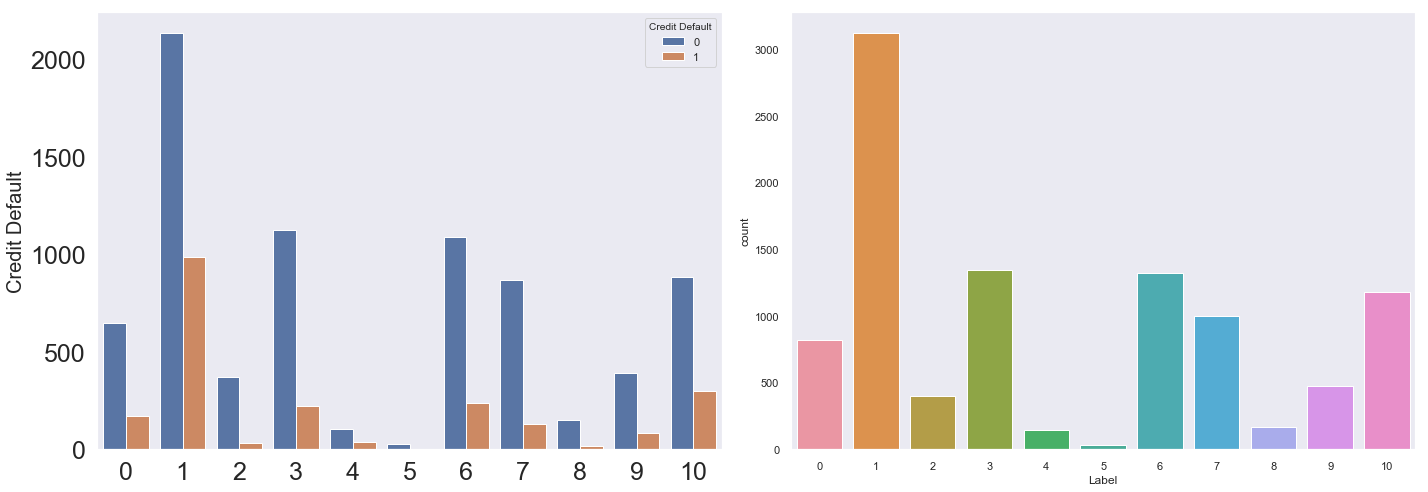

In [309]:
fig = plt.figure(figsize=(20,20))
fig_dims = (3,2)

plt.subplot2grid(fig_dims, (0, 0))
b = sns.countplot(df['Label'], hue=df['credit_default'])
plt.xticks(rotation=0)
b.set_xlabel("",fontsize=20)
b.set_ylabel("Credit Default",fontsize=20)
b.tick_params(labelsize=25)
b.legend_.set_title('Credit Default')

tmpDF = df[['pa-sep', 'Label']]
# Plot completo con la distribuzione dei vari record all'interno dei vari cluster
plt.subplot2grid(fig_dims, (0, 1))
sns.countplot(x='Label',data=tmpDF)



plt.tight_layout()
plt.show()




In [310]:
df[df['Label']==9].head()

,limit,ba-aug,pa-sep,credit_default,Label
9,200000,177233,0,1,9
32,220000,192815,8500,0,9
44,210000,196361,7100,0,9
65,240000,232729,9000,0,9
79,290000,192512,8000,0,9


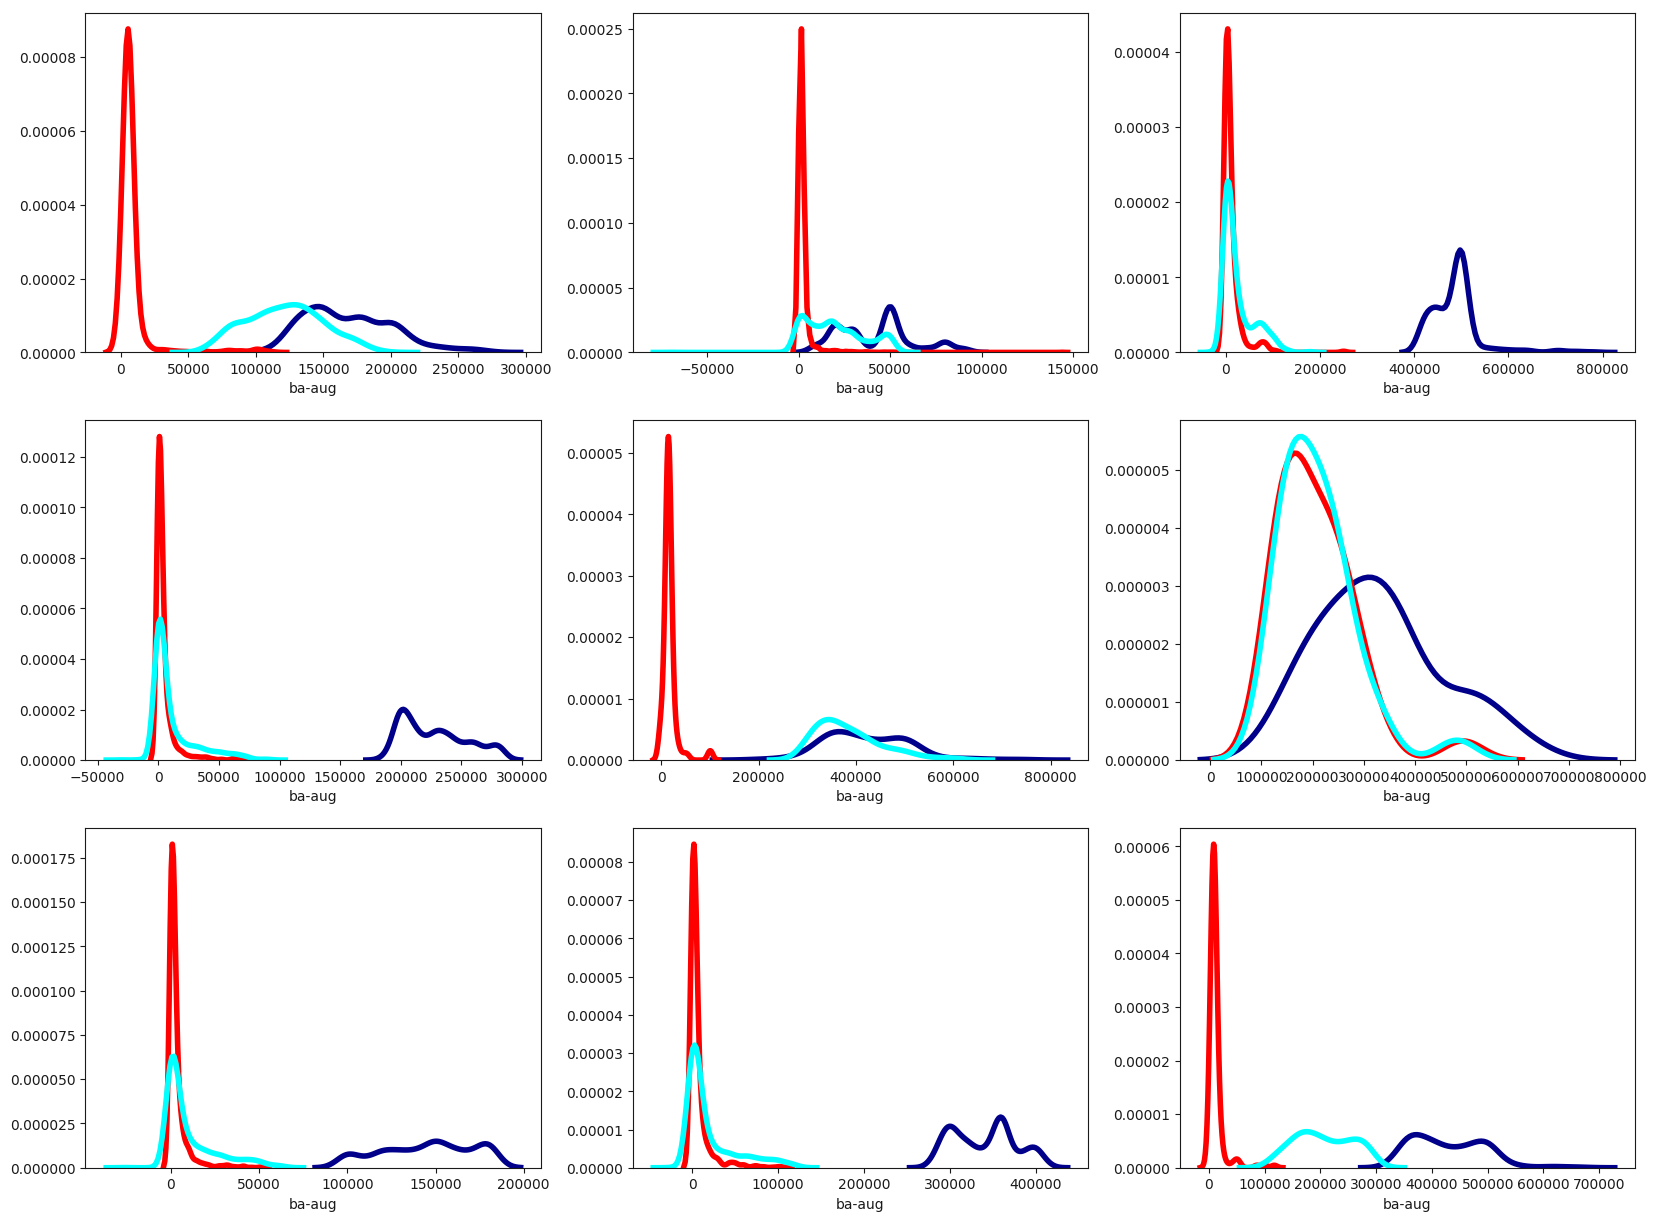

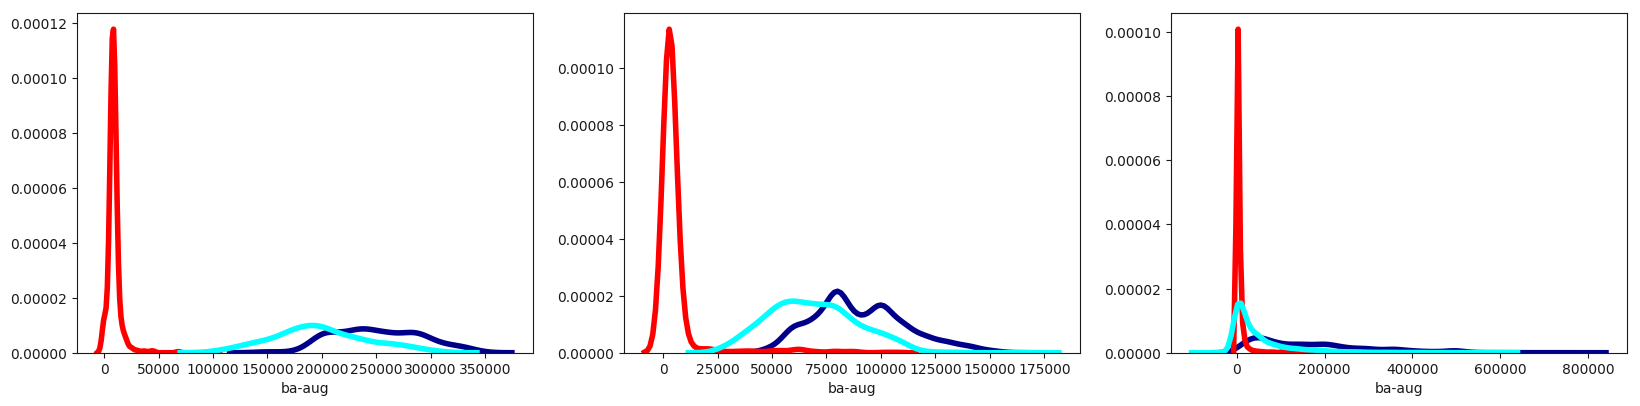

In [315]:
fig = plt.figure(figsize=(20,15))
fig_dims = (3,3)



plt.subplot2grid(fig_dims, (0, 0))
sns.distplot(df[df['Label'] == 0]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 0]['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 0]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


plt.subplot2grid(fig_dims, (0, 1))
sns.distplot(df[df['Label'] == 1]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 1]['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 1]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.subplot2grid(fig_dims, (0, 2))
sns.distplot(df[df['Label'] == 2]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 2]['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 2]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.subplot2grid(fig_dims, (1, 0))
sns.distplot(df[df['Label'] == 3]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 3]['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 3]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.subplot2grid(fig_dims, (1, 1))
sns.distplot(df[df['Label'] == 4]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 4]['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 4]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


plt.subplot2grid(fig_dims, (1, 2))
sns.distplot(df[df['Label'] == 5]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 5]['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 5]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


plt.subplot2grid(fig_dims, (2, 0))
sns.distplot(df[df['Label'] == 6]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 6]['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 6]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.subplot2grid(fig_dims, (2, 1))
sns.distplot(df[df['Label'] == 7]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 7]['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 7]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.subplot2grid(fig_dims, (2, 2))
sns.distplot(df[df['Label'] == 8]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 8]['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 8]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

fig = plt.figure(figsize=(20,15))
fig_dims = (3,3)

plt.subplot2grid(fig_dims, (0,0))
sns.distplot(df[df['Label'] == 9]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 9]['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 9]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.subplot2grid(fig_dims, (0,1))
sns.distplot(df[df['Label'] == 10]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 10]['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 10]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.subplot2grid(fig_dims, (0,2))
sns.distplot(df['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.show()

In [314]:
plt.rcParams.update(plt.rcParamsDefault)

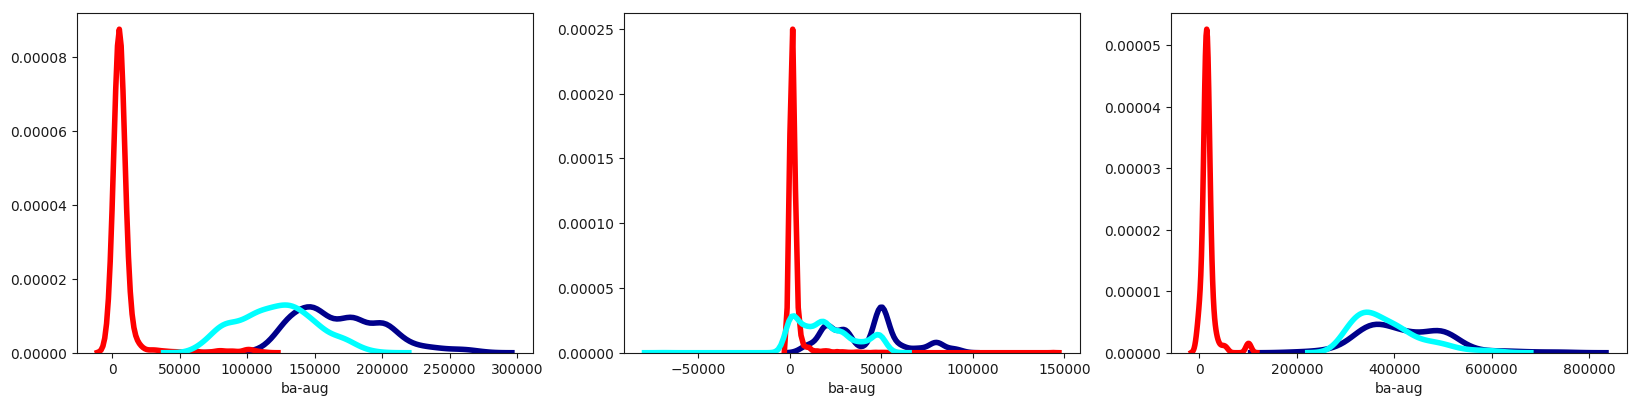

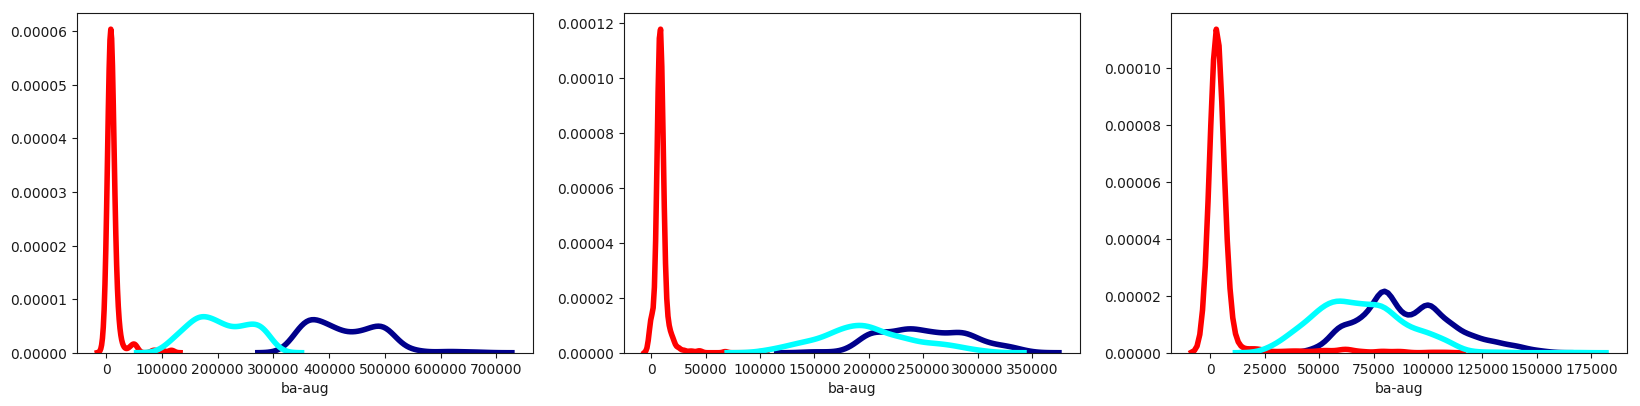

In [319]:
fig = plt.figure(figsize=(20,15))
fig_dims = (3,3)



plt.subplot2grid(fig_dims, (0, 0))
sns.distplot(df[df['Label'] == 0]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 0]['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 0]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


plt.subplot2grid(fig_dims, (0, 1))
sns.distplot(df[df['Label'] == 1]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 1]['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 1]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


plt.subplot2grid(fig_dims, (0, 2))
sns.distplot(df[df['Label'] == 4]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 4]['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 4]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})



fig = plt.figure(figsize=(20,15))
fig_dims = (3,3)


plt.subplot2grid(fig_dims, (0, 0))
sns.distplot(df[df['Label'] == 8]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 8]['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 8]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})



plt.subplot2grid(fig_dims, (0,1))
sns.distplot(df[df['Label'] == 9]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 9]['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 9]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.subplot2grid(fig_dims, (0,2))
sns.distplot(df[df['Label'] == 10]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 10]['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 10]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


plt.show()

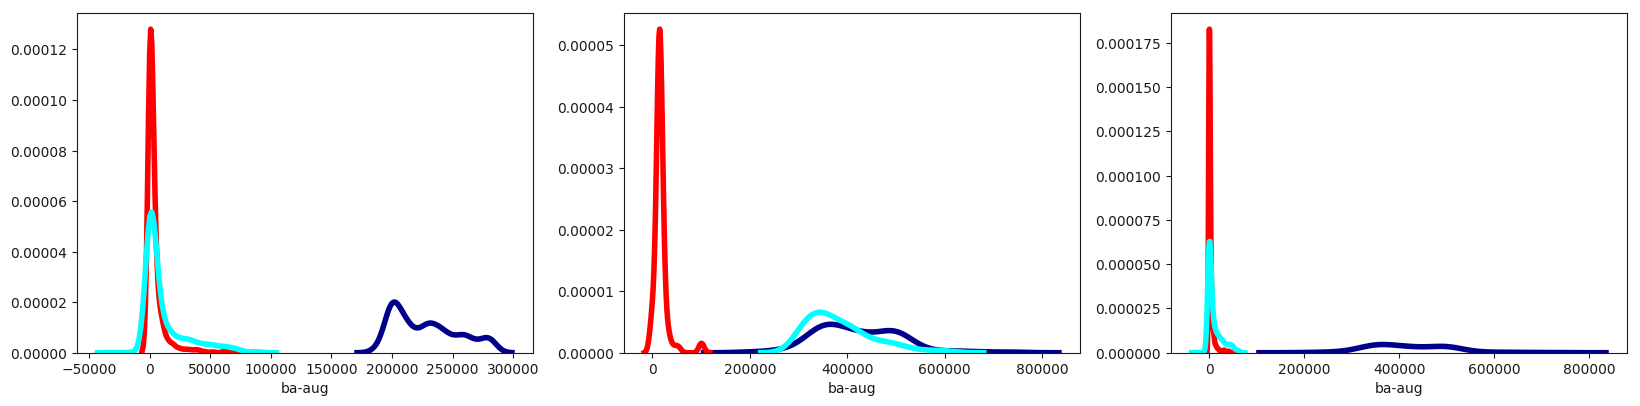

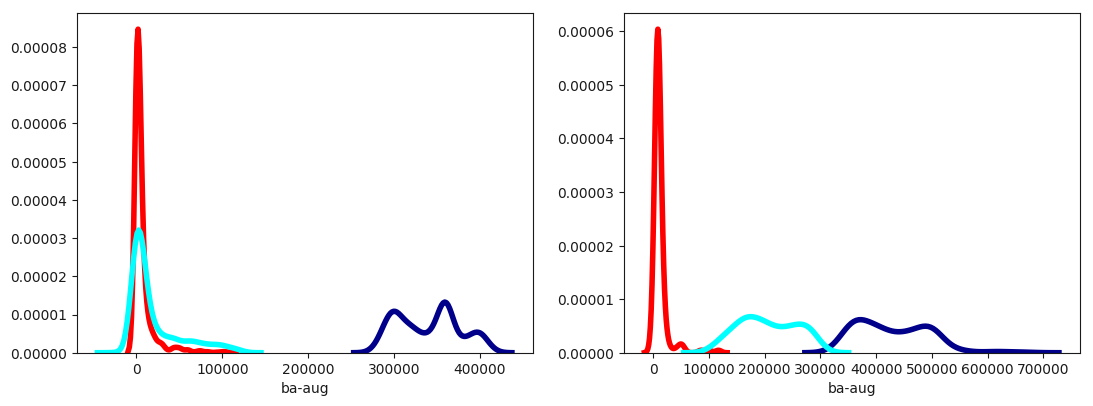

In [321]:
fig = plt.figure(figsize=(20,15))
fig_dims = (3,3)



plt.subplot2grid(fig_dims, (0, 0))
sns.distplot(df[df['Label'] == 3]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 3]['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 3]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


plt.subplot2grid(fig_dims, (0, 1))
sns.distplot(df[df['Label'] == 4]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 4]['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 4]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


plt.subplot2grid(fig_dims, (0, 2))
sns.distplot(df[df['Label'] == 4]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 6]['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 6]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})



fig = plt.figure(figsize=(20,15))
fig_dims = (3,3)


plt.subplot2grid(fig_dims, (0, 0))
sns.distplot(df[df['Label'] == 7]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 7]['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 7]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})



plt.subplot2grid(fig_dims, (0,1))
sns.distplot(df[df['Label'] == 8]['limit'], hist=False, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 8]['pa-sep'], hist=False, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

sns.distplot(df[df['Label'] == 8]['ba-aug'], hist=False, kde=True, 
             color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})



plt.show()

## Cluster con DBScan

In [26]:
df.head()

,limit,ba-aug,pa-sep,credit_default
0,50000,49985,2130,0
1,200000,9981,10120,0
2,30000,29280,0,0
3,140000,41717,2000,0
4,60000,48716,1788,1


In [27]:
from sklearn.cluster import DBSCAN

In [28]:
from scipy.spatial.distance import pdist, squareform

In [29]:
dist = pdist(X, 'euclidean')
dist = squareform(dist)

In [30]:
# Stimare il migliore eps

dist = pdist(X, 'euclidean')
dist = squareform(dist)

k = 5
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

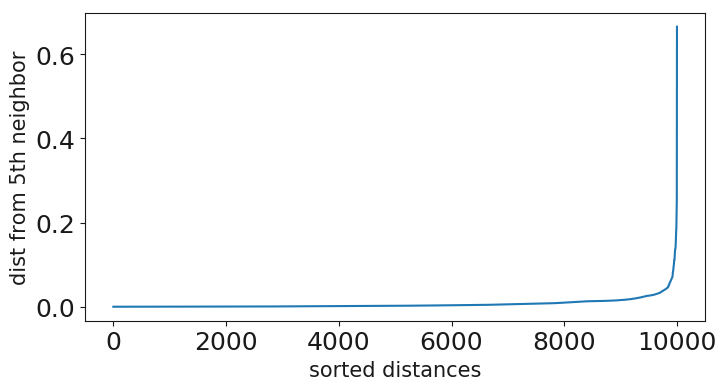

In [31]:
plt.figure(figsize=(8,4))
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=15)
plt.xlabel('sorted distances', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

In [32]:

import pylab as pl
values = []
sil = []
possibleK = [5,15,50,70,100,130,160,200,240,250]

for item in possibleK:
    silh = []
    valuestemp = []
    for i in pl.frange(0.05,0.25,0.01):
        dbscan = DBSCAN(eps=i, min_samples=item)
        dbscan.fit(X)

        silh.append(silhouette_score(X, dbscan.labels_))
        valuestemp.append(i)
    sil.append(silh)
    values.append(valuestemp)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: numpy.arange
  # Remove the CWD from sys.path while we load stuff.


In [33]:
print sil

[[0.5811581942962517, 0.21786364575545003, 0.6264349288082721, 0.5710563207769658, 0.570662034156617, 0.621576941519008, 0.6665640660904215, 0.6718848868112979, 0.6995650337765384, 0.7271535904070145, 0.730199537522129, 0.7350867059583341, 0.7462019326969171, 0.7612973863513262, 0.7720085810423728, 0.7720085810423728, 0.7720085810423728, 0.7720085810423728, 0.7720085810423728, 0.7720085810423728, 0.7720085810423728], [0.5729487789571762, 0.5830709930431867, 0.6167371205826617, 0.6155491198422646, 0.631949497625405, 0.6350386482666424, 0.6413558203918852, 0.6456592218793279, 0.6592124242611553, 0.6631027247646165, 0.6669071828774741, 0.6759485558869235, 0.6961461846781107, 0.6999225971561569, 0.7204465449343784, 0.7373626532216973, 0.7720085810423728, 0.7720085810423728, 0.7720085810423728, 0.7720085810423728, 0.7720085810423728], [0.5352799224541396, 0.5608313779608268, 0.5787009733026902, 0.596060357909968, 0.6194068555537923, 0.6277504590472196, 0.6342527767579568, 0.6460546200974479

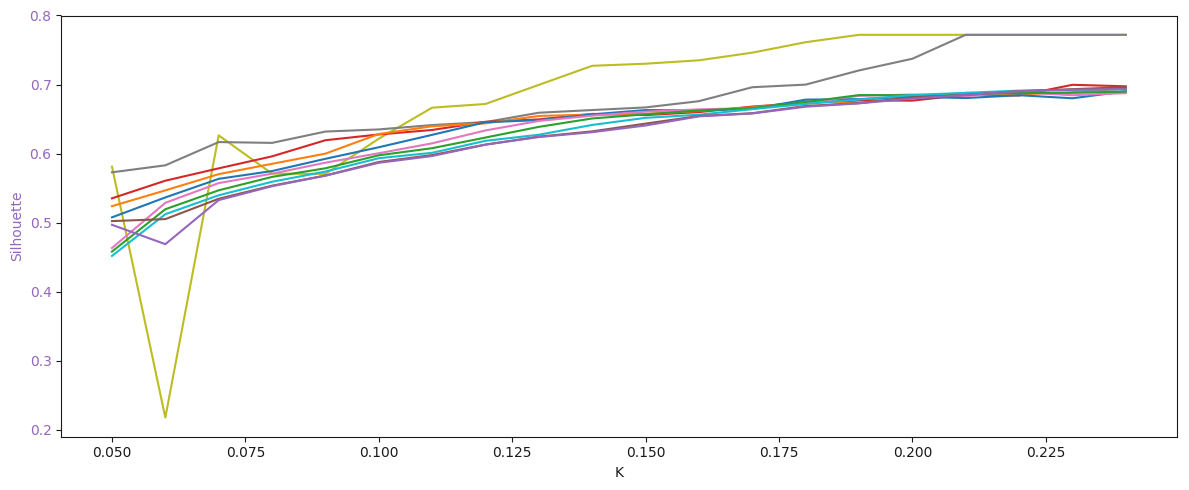

In [34]:
fig, ax1 = plt.subplots(figsize=(12, 5))
t = np.arange(0.05, 0.25, 0.01)
color = 'tab:olive'
ax1.set_xlabel('K')
ax1.set_ylabel('Silhouette', color=color)
ax1.plot(t, sil[0][:20], color=color)
ax1.tick_params(axis='y', labelcolor=color)



t = np.arange(0.05, 0.25, 0.01)
color = 'tab:grey'
ax1.set_xlabel('K')
ax1.set_ylabel('Silhouette', color=color)
ax1.plot(t, sil[1][:20], color=color)
ax1.tick_params(axis='y', labelcolor=color)


t = np.arange(0.05, 0.25, 0.01)
color = 'tab:red'
ax1.set_xlabel('K')
ax1.set_ylabel('Silhouette', color=color)
ax1.plot(t, sil[2][:20], color=color)
ax1.tick_params(axis='y', labelcolor=color)


t = np.arange(0.05, 0.25, 0.01)
color = 'tab:orange'
ax1.set_xlabel('K')
ax1.set_ylabel('Silhouette', color=color)
ax1.plot(t, sil[3][:20], color=color)
ax1.tick_params(axis='y', labelcolor=color)


t = np.arange(0.05, 0.25, 0.01)
color = 'tab:blue'
ax1.set_xlabel('K')
ax1.set_ylabel('Silhouette', color=color)
ax1.plot(t, sil[4][:20], color=color)
ax1.tick_params(axis='y', labelcolor=color)

t = np.arange(0.05, 0.25, 0.01)
color = 'tab:pink'
ax1.set_xlabel('K')
ax1.set_ylabel('Silhouette', color=color)
ax1.plot(t, sil[5][:20], color=color)
ax1.tick_params(axis='y', labelcolor=color)


t = np.arange(0.05, 0.25, 0.01)
color = 'tab:green'
ax1.set_xlabel('K')
ax1.set_ylabel('Silhouette', color=color)
ax1.plot(t, sil[6][:20], color=color)
ax1.tick_params(axis='y', labelcolor=color)


t = np.arange(0.05, 0.25, 0.01)
color = 'tab:cyan'
ax1.set_xlabel('K')
ax1.set_ylabel('Silhouette', color=color)
ax1.plot(t, sil[7][:20], color=color)
ax1.tick_params(axis='y', labelcolor=color)


t = np.arange(0.05, 0.25, 0.01)
color = 'tab:brown'
ax1.set_xlabel('K')
ax1.set_ylabel('Silhouette', color=color)
ax1.plot(t, sil[8][:20], color=color)
ax1.tick_params(axis='y', labelcolor=color)


t = np.arange(0.05, 0.25, 0.01)
color = 'tab:purple'
ax1.set_xlabel('K')
ax1.set_ylabel('Silhouette', color=color)
ax1.plot(t, sil[9][:20], color=color)
ax1.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [62]:

dbscan = DBSCAN(eps=0.225, min_samples=240)
dbscan.fit(X)


DBSCAN(algorithm='auto', eps=0.225, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=240, n_jobs=None, p=None)

In [63]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0]), array([  35, 9965]))

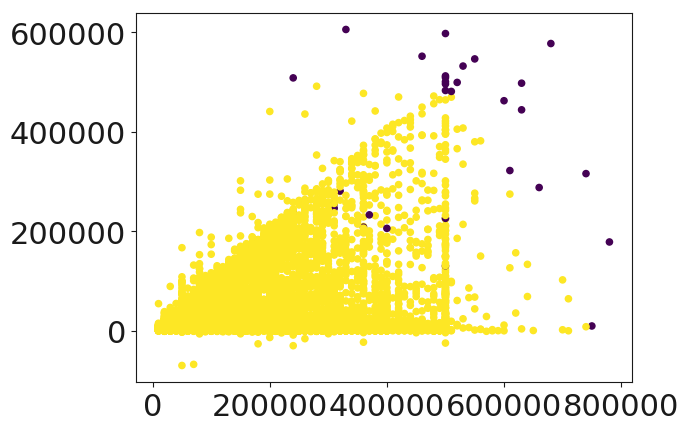

In [64]:
plt.scatter(df['limit'], df['ba-aug'], c=dbscan.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [65]:
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))

Silhouette 0.692508417070838


In [66]:

df['Label'] = dbscan.labels_

In [67]:
pd.crosstab(df['credit_default'], df['Label'])

Label,-1,0
credit_default,,
0,28,7760
1,7,2205


In [68]:
df.head()

,limit,ba-aug,pa-sep,credit_default,Label
0,50000,49985,2130,0,0
1,200000,9981,10120,0,0
2,30000,29280,0,0,0
3,140000,41717,2000,0,0
4,60000,48716,1788,1,0


In [80]:
tmpDF = df[df['Label']==0]

scaler = MinMaxScaler()
Y = scaler.fit_transform(tmpDF.iloc[:,0:3].values)
Y

array([[0.05479452, 0.21325978, 0.01112585],
       [0.26027397, 0.14202479, 0.05286086],
       [0.02739726, 0.17639046, 0.        ],
       ...,
       [0.10958904, 0.17538971, 0.01044681],
       [0.01369863, 0.12425166, 0.        ],
       [0.36986301, 0.58650802, 0.05238031]])

In [108]:
# Stimare il migliore eps

dist = pdist(Y, 'euclidean')
dist = squareform(dist)

k = 50
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

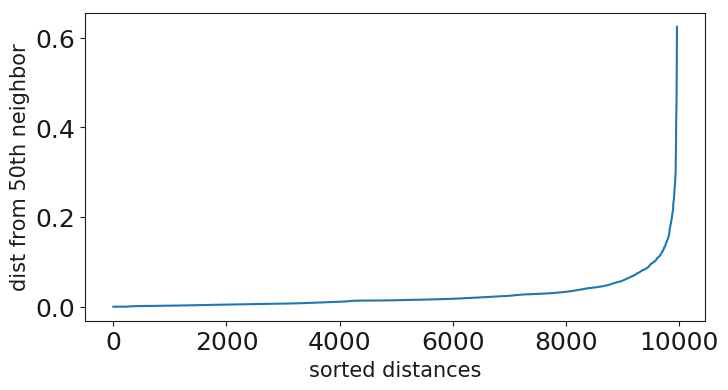

In [109]:
plt.figure(figsize=(8,4))
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=15)
plt.xlabel('sorted distances', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

In [112]:

import pylab as pl
values = []
sil = []
possibleK = [85,100,130,160,200,230,260,290,350]

for item in possibleK:
    silh = []
    valuestemp = []
    for i in pl.frange(0.010,0.15,0.010):
        dbscan = DBSCAN(eps=i, min_samples=item)
        dbscan.fit(Y)
        print "k = ", item
        print "eps = ", i
        print np.unique(dbscan.labels_, return_counts=True)
        silh.append(silhouette_score(Y, dbscan.labels_))
        valuestemp.append(i)
    sil.append(silh)
    values.append(valuestemp)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: numpy.arange
  # Remove the CWD from sys.path while we load stuff.


k =  85
eps =  0.01
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]), array([6350, 1032,  345,  104,  147,   99,  611,  107,  208,  151,  125,
         91,  159,  110,  139,   94,   93]))
k =  85
eps =  0.02
(array([-1,  0,  1,  2,  3]), array([3298, 6193,  127,  258,   89]))
k =  85
eps =  0.03
(array([-1,  0,  1]), array([2150, 7683,  132]))
k =  85
eps =  0.04
(array([-1,  0,  1]), array([1423, 8384,  158]))
k =  85
eps =  0.05
(array([-1,  0]), array([1049, 8916]))
k =  85
eps =  0.060000000000000005
(array([-1,  0]), array([ 771, 9194]))
k =  85
eps =  0.06999999999999999
(array([-1,  0]), array([ 605, 9360]))
k =  85
eps =  0.08
(array([-1,  0]), array([ 496, 9469]))
k =  85
eps =  0.09
(array([-1,  0]), array([ 399, 9566]))
k =  85
eps =  0.09999999999999999
(array([-1,  0]), array([ 329, 9636]))
k =  85
eps =  0.11
(array([-1,  0]), array([ 261, 9704]))
k =  85
eps =  0.12
(array([-1,  0]), array([ 208, 9757]))
k =  85
eps =  0.13
(array([-1,  0]), a

k =  290
eps =  0.13
(array([-1,  0]), array([ 367, 9598]))
k =  290
eps =  0.14
(array([-1,  0]), array([ 332, 9633]))
k =  290
eps =  0.15000000000000002
(array([-1,  0]), array([ 289, 9676]))
k =  350
eps =  0.01
(array([-1,  0]), array([9615,  350]))
k =  350
eps =  0.02
(array([-1,  0,  1]), array([6623, 2742,  600]))
k =  350
eps =  0.03
(array([-1,  0]), array([4352, 5613]))
k =  350
eps =  0.04
(array([-1,  0]), array([3307, 6658]))
k =  350
eps =  0.05
(array([-1,  0]), array([2262, 7703]))
k =  350
eps =  0.060000000000000005
(array([-1,  0]), array([1724, 8241]))
k =  350
eps =  0.06999999999999999
(array([-1,  0]), array([1386, 8579]))
k =  350
eps =  0.08
(array([-1,  0]), array([1154, 8811]))
k =  350
eps =  0.09
(array([-1,  0]), array([ 783, 9182]))
k =  350
eps =  0.09999999999999999
(array([-1,  0]), array([ 650, 9315]))
k =  350
eps =  0.11
(array([-1,  0]), array([ 545, 9420]))
k =  350
eps =  0.12
(array([-1,  0]), array([ 460, 9505]))
k =  350
eps =  0.13
(array([

In [119]:
print sil[7]

[-0.1633706954633328, -0.027506615738341792, 0.3528631610477893, 0.2821833697927526, 0.44732944281972736, 0.48651459361672555, 0.5040908427928529, 0.5108082129982052, 0.5317022567616037, 0.5470001532698509, 0.5591333177494403, 0.5731970217027352, 0.5817123117464066, 0.59137970741556, 0.5975627619275216]


In [ ]:
dbscan = DBSCAN(eps=0.06, min_samples=200)
dbscan.fit(Y)

np.unique(dbscan.labels_, return_counts=True)

## Clustering Gerarchico

In [120]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
import sklearn
import fastcluster

In [121]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram ')
        plt.xlabel('distance')
        plt.ylabel('sample index or (cluster size)')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axvline(x=max_d, c='k')
    return ddata

In [170]:
df.head()

,limit,ba-aug,pa-sep,credit_default
0,50000,49985,2130,0
1,200000,9981,10120,0
2,30000,29280,0,0
3,140000,41717,2000,0
4,60000,48716,1788,1


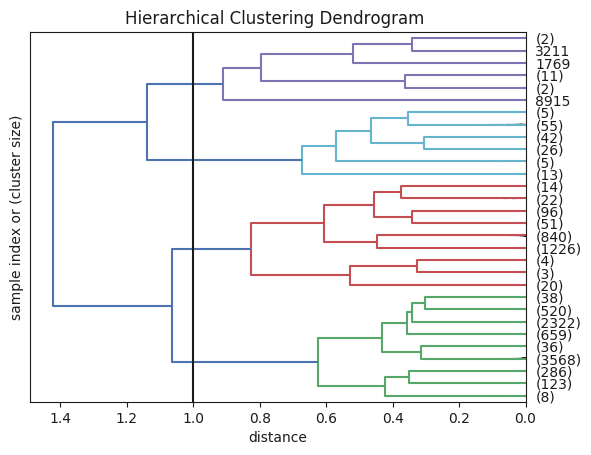

In [171]:
data_dist = pdist(X, metric='euclidean')
# Generazione della matrice linkage
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = fancy_dendrogram(data_link, color_threshold=1.0, truncate_mode='lastp',leaf_rotation=0, orientation='left',show_leaf_counts=True, show_contracted=True,max_d=1, annotate_above=10)

# Sull'asse delle X abbiamo le distanze, sull'asse delle X sono gli indici dei sample dei dati

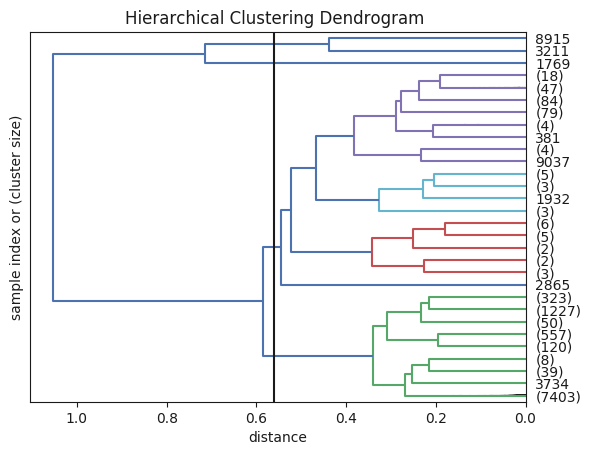

In [178]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = fancy_dendrogram(data_link, color_threshold=0.4, truncate_mode='lastp',leaf_rotation=0, orientation='left', show_leaf_counts=True, show_contracted=True,max_d=0.56, annotate_above=10)

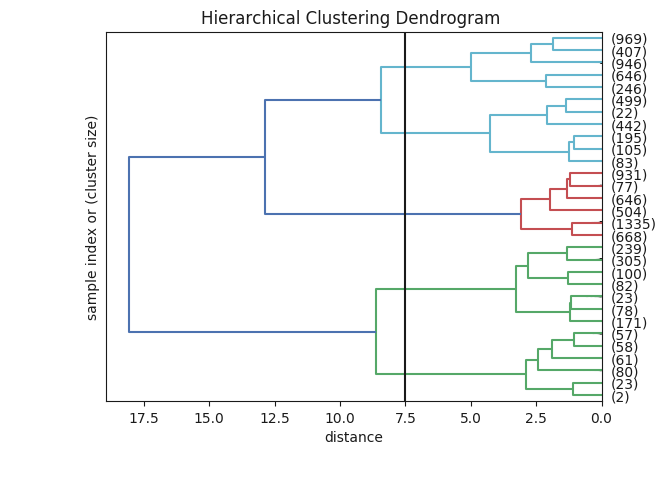

In [179]:
data_dist = pdist(X, metric='euclidean')
# Ward è il metodo che utilizziamo per misurare la distanza tra i cluster appena creati
data_link = linkage(data_dist, method='ward', metric='euclidean')
res = fancy_dendrogram(data_link, color_threshold=10, truncate_mode='lastp',leaf_rotation=0, orientation='left', show_leaf_counts=True, show_contracted=True,max_d=7.5, annotate_above=10)

## Valutazione dei cluster

#### Complete

In [185]:
from sklearn.cluster import AgglomerativeClustering
connectivity=None
for i in range(2, 10):
    complete = AgglomerativeClustering(n_clusters=i, linkage='complete', affinity='euclidean', connectivity=connectivity)
    complete.fit(X)
    hist, bins = np.histogram(complete.labels_, bins=range(0, len(set(complete.labels_)) + 1))
    
    print 'Numero Cluster: ', i
    print 'Cluster', dict(zip(bins, hist))
    print 'Silhouette Score', silhouette_score(X, complete.labels_)

2 clusters:
labels {0: 164, 1: 9836}
silhouette 0.6277084803056014
3 clusters:
labels {0: 9836, 1: 18, 2: 146}
silhouette 0.6214374732648321
4 clusters:
labels {0: 18, 1: 2276, 2: 146, 3: 7560}
silhouette 0.4988378742544621
5 clusters:
labels {0: 2276, 1: 17, 2: 146, 3: 7560, 4: 1}
silhouette 0.4986466522074219
6 clusters:
labels {0: 17, 1: 7560, 2: 146, 3: 2249, 4: 1, 5: 27}
silhouette 0.47783909439488553
7 clusters:
labels {0: 146, 1: 7560, 2: 27, 3: 2249, 4: 1, 5: 4, 6: 13}
silhouette 0.4775529257209033
8 clusters:
labels {0: 7560, 1: 2249, 2: 27, 3: 133, 4: 1, 5: 4, 6: 13, 7: 13}
silhouette 0.4732047975217086
9 clusters:
labels {0: 2249, 1: 133, 2: 27, 3: 7143, 4: 1, 5: 4, 6: 13, 7: 13, 8: 417}
silhouette 0.4801567475046634


#### Average

In [186]:
from sklearn.cluster import AgglomerativeClustering
connectivity=None
for i in range(2, 10):
    average = AgglomerativeClustering(n_clusters=i, linkage='average', affinity='euclidean', connectivity=connectivity)
    average.fit(X)
    hist, bins = np.histogram(complete.labels_, bins=range(0, len(set(average.labels_)) + 1))
    
    print 'Numero Cluster: ', i
    print 'Cluster', dict(zip(bins, hist))
    print 'Silhouette Score', silhouette_score(X, average.labels_)

2 clusters:
labels {0: 2249, 1: 160}
silhouette 0.7720085810423728
3 clusters:
labels {0: 2249, 1: 133, 2: 7170}
silhouette 0.7323805792911509
4 clusters:
labels {0: 2249, 1: 133, 2: 27, 3: 7144}
silhouette 0.6067657069185207
5 clusters:
labels {0: 2249, 1: 133, 2: 27, 3: 7143, 4: 5}
silhouette 0.6022980550599847
6 clusters:
labels {0: 2249, 1: 133, 2: 27, 3: 7143, 4: 1, 5: 17}
silhouette 0.5984783630205602
7 clusters:
labels {0: 2249, 1: 133, 2: 27, 3: 7143, 4: 1, 5: 4, 6: 26}
silhouette 0.5847679198730995
8 clusters:
labels {0: 2249, 1: 133, 2: 27, 3: 7143, 4: 1, 5: 4, 6: 13, 7: 430}
silhouette 0.5846274171218605
9 clusters:
labels {0: 2249, 1: 133, 2: 27, 3: 7143, 4: 1, 5: 4, 6: 13, 7: 13, 8: 417}
silhouette 0.5803585067076326


#### Ward

In [187]:
from sklearn.cluster import AgglomerativeClustering
connectivity=None

for i in range(2, 10):
    ward = AgglomerativeClustering(n_clusters=i, linkage='ward', affinity='euclidean', connectivity=connectivity)
    ward.fit(X)
    hist, bins = np.histogram(ward.labels_, bins=range(0, len(set(ward.labels_)) + 1))
    
    print 'Numero Cluster: ', i
    print 'Cluster', dict(zip(bins, hist))
    print 'Silhouette Score', silhouette_score(X, ward.labels_)

2 clusters:
labels {0: 8721, 1: 1279}
silhouette 0.5511754624661784
3 clusters:
labels {0: 1279, 1: 4560, 2: 4161}
silhouette 0.41461217416233886
4 clusters:
labels {0: 4560, 1: 998, 2: 4161, 3: 281}
silhouette 0.41955293673662536
5 clusters:
labels {0: 3214, 1: 1346, 2: 4161, 3: 281, 4: 998}
silhouette 0.4883216157588073
6 clusters:
labels {0: 1346, 1: 998, 2: 4161, 3: 281, 4: 2322, 5: 892}
silhouette 0.4515661810833612
7 clusters:
labels {0: 998, 1: 281, 2: 4161, 3: 963, 4: 2322, 5: 892, 6: 383}
silhouette 0.4467998522956019
8 clusters:
labels {0: 4161, 1: 281, 2: 726, 3: 963, 4: 2322, 5: 892, 6: 383, 7: 272}
silhouette 0.44944151581802255
9 clusters:
labels {0: 281, 1: 2322, 2: 726, 3: 963, 4: 2158, 5: 892, 6: 383, 7: 272, 8: 2003}
silhouette 0.3515018263038154


In [198]:
from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(X, n_neighbors=1, mode='distance', include_self=False, n_jobs=-1)
connectivity = 0.5 * (connectivity + connectivity.T)
connectivity

<10000x10000 sparse matrix of type '<type 'numpy.float64'>'
	with 12726 stored elements in Compressed Sparse Row format>

#### KMeans

0.4299742323889855

#### DBScan

0.4316242070683634

#### Gerarchico

0.7323805792911509